# Background

- **Author**: `<郭伊軒>`
- **Created At**: `<2025-10-30>`
- **Research Motivation and Context (why are we interested in the findings?)：**
- **Main Findings and Takeaways：**
- **Future Direciton：**

In [8]:
# Load packages here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [22]:
# Load input data here and please finish all the data manipulation here.
input_data_file = "/Users/10610/Desktop/114-1 資料/steam-project/discount-timing-DE.csv"
df = pd.read_csv(input_data_file)
# Finish this block by printing the first ten observations of the data.
# Note:
# - You may only read data from /data/processed.
# - Files in /data/processed should already be cleaned and prepared for analysis.
# - Beyond simple filtering of observations or generating a small number of variables,
#   further data manipulation is not allowed. If more extensive changes are needed,
#   update the source data instead.


### Sample

In [4]:
df.head()

Date  GameID    Type  MultiPlayer Publisher  ConstantDiscount  \
0  2023-05-01      10  Action            1     Valve                 0   
1  2023-05-02      10  Action            1     Valve                 0   
2  2023-05-03      10  Action            1     Valve                 0   
3  2023-05-04      10  Action            1     Valve                 0   
4  2023-05-05      10  Action            1     Valve                 0   

   DiscountOrNot  DiscountDuration        Age  AccumulatedPositiveRate  ...  \
0              0                 0  22.509589                 0.975206  ...   
1              0                 0  22.512329                 0.975184  ...   
2              0                 0  22.515068                 0.975189  ...   
3              0                 0  22.517808                 0.975183  ...   
4              0                 0  22.520548                 0.975170  ...   

   FollowersGrowthRate1M  PositiveRateGrowthRate1W  PositiveRateGrowthRate2W  \
0               0.003889                  0.000012                 -0.000014   
1               0.003913                 -0.000010                 -0.000036   
2               0.003979                 -0.000011                 -0.000041   
3               0.004101                 -0.000012                 -0.000050   
4               0.003912                 -0.000023                 -0.000053   

   PositiveRateGrowthRate1M  DLC_sum_1W  DLC_sum_2W  DLC_sum_1M  \
0              1.098178e-05           0           0           0   
1             -4.698912e-07           0           0           0   
2             -8.082766e-07           0           0           0   
3             -2.450820e-05           0           0           0   
4             -3.754777e-05           0           0           0   

   Sequel_sum_1W  Sequel_sum_2W  Sequel_sum_1M  
0              0              0              0  
1              0              0              0  
2              0              0              0  
3              0              0              0  
4              0              0              0  

[5 rows x 28 columns]

In [5]:
df.describe().T

count           mean            std        min  \
GameID                    23938.0  461376.742000  298559.181056  10.000000   
MultiPlayer               23938.0       0.464241       0.498730   0.000000   
ConstantDiscount          23938.0       0.214387       0.410405   0.000000   
DiscountOrNot             23938.0       0.019885       0.139607   0.000000   
DiscountDuration          23938.0       0.221196       1.715483   0.000000   
Age                       23938.0       7.634427       4.458471   2.389041   
AccumulatedPositiveRate   23938.0       0.928061       0.064186   0.738751   
SalePeriod                23938.0       0.146420       0.353534   0.000000   
DiscountDuringSale        23938.0       0.101220       0.301626   0.000000   
DiscountOutOfSale         23938.0       0.120729       0.325818   0.000000   
PlayerGrowthRate1W        23938.0       0.020047       0.288771  -0.592919   
PlayerGrowthRate2W        23938.0       0.032978       0.370759  -0.726683   
PlayerGrowthRate1M        23938.0       0.039727       0.395094  -0.768049   
FollowersGrowthRate1W     23938.0       0.001576       0.001482  -0.000137   
FollowersGrowthRate2W     23938.0       0.003159       0.002758  -0.000176   
FollowersGrowthRate1M     23938.0       0.006816       0.005480   0.000085   
PositiveRateGrowthRate1W  23938.0       0.000017       0.000332  -0.015190   
PositiveRateGrowthRate2W  23938.0       0.000033       0.000569  -0.016712   
PositiveRateGrowthRate1M  23938.0       0.000070       0.001033  -0.017811   
DLC_sum_1W                23938.0       0.004679       0.071822   0.000000   
DLC_sum_2W                23938.0       0.009358       0.101767   0.000000   
DLC_sum_1M                23938.0       0.020553       0.150182   0.000000   
Sequel_sum_1W             23938.0       0.001170       0.034181   0.000000   
Sequel_sum_2W             23938.0       0.002339       0.048312   0.000000   
Sequel_sum_1M             23938.0       0.005013       0.070626   0.000000   

                                    25%            50%            75%  \
GameID                    244850.000000  431730.000000  644930.000000   
MultiPlayer                    0.000000       0.000000       1.000000   
ConstantDiscount               0.000000       0.000000       0.000000   
DiscountOrNot                  0.000000       0.000000       0.000000   
DiscountDuration               0.000000       0.000000       0.000000   
Age                            4.951370       6.323288       8.479452   
AccumulatedPositiveRate        0.905517       0.953165       0.972651   
SalePeriod                     0.000000       0.000000       0.000000   
DiscountDuringSale             0.000000       0.000000       0.000000   
DiscountOutOfSale              0.000000       0.000000       0.000000   
PlayerGrowthRate1W            -0.063356      -0.014085       0.035173   
PlayerGrowthRate2W            -0.088489      -0.013852       0.060643   
PlayerGrowthRate1M            -0.108811      -0.009196       0.090659   
FollowersGrowthRate1W          0.000640       0.001111       0.002078   
FollowersGrowthRate2W          0.001343       0.002289       0.004157   
FollowersGrowthRate1M          0.003142       0.005071       0.009104   
PositiveRateGrowthRate1W      -0.000025       0.000005       0.000044   
PositiveRateGrowthRate2W      -0.000041       0.000009       0.000077   
PositiveRateGrowthRate1M      -0.000078       0.000015       0.000151   
DLC_sum_1W                     0.000000       0.000000       0.000000   
DLC_sum_2W                     0.000000       0.000000       0.000000   
DLC_sum_1M                     0.000000       0.000000       0.000000   
Sequel_sum_1W                  0.000000       0.000000       0.000000   
Sequel_sum_2W                  0.000000       0.000000       0.000000   
Sequel_sum_1M                  0.000000       0.000000       0.000000   

                                   max  
GameID                    1.145360e+06  
MultiPlayer       

### The actual analysis starts below
Make the graphs, summary statistics, regression model below.
Make sure you have followed the guidelines as specified in 
[專案資料夾結構、檔案命名與文件規範](https://docs.google.com/document/d/1sl6gEFMdmiGsiNjLe17UmZ30xKxq15U0Mb2B-Jvusxg/edit?tab=t.33iie8ybx7s4).


In [23]:
df['Date'] = pd.to_datetime(df['Date'])
game_id = df['GameID'].unique()   # 取得所有獨特的 GameID
game_dfs = []                     # 用來裝每個遊戲的 DataFrame

for gid in game_id:
    sub_df = df[df['GameID'] == gid]  # 篩選出該 GameID 的資料
    game_dfs.append(sub_df)


1W

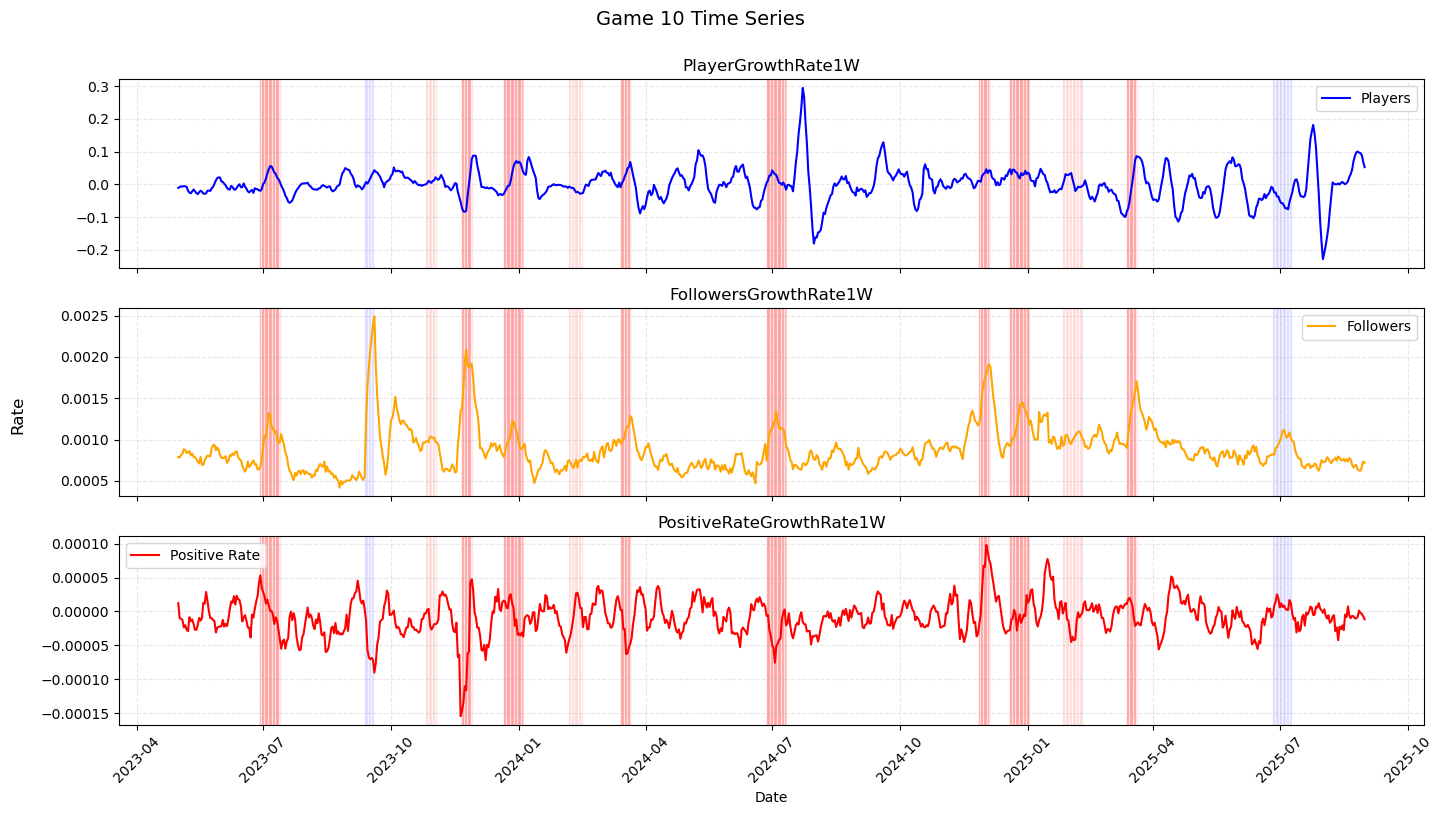

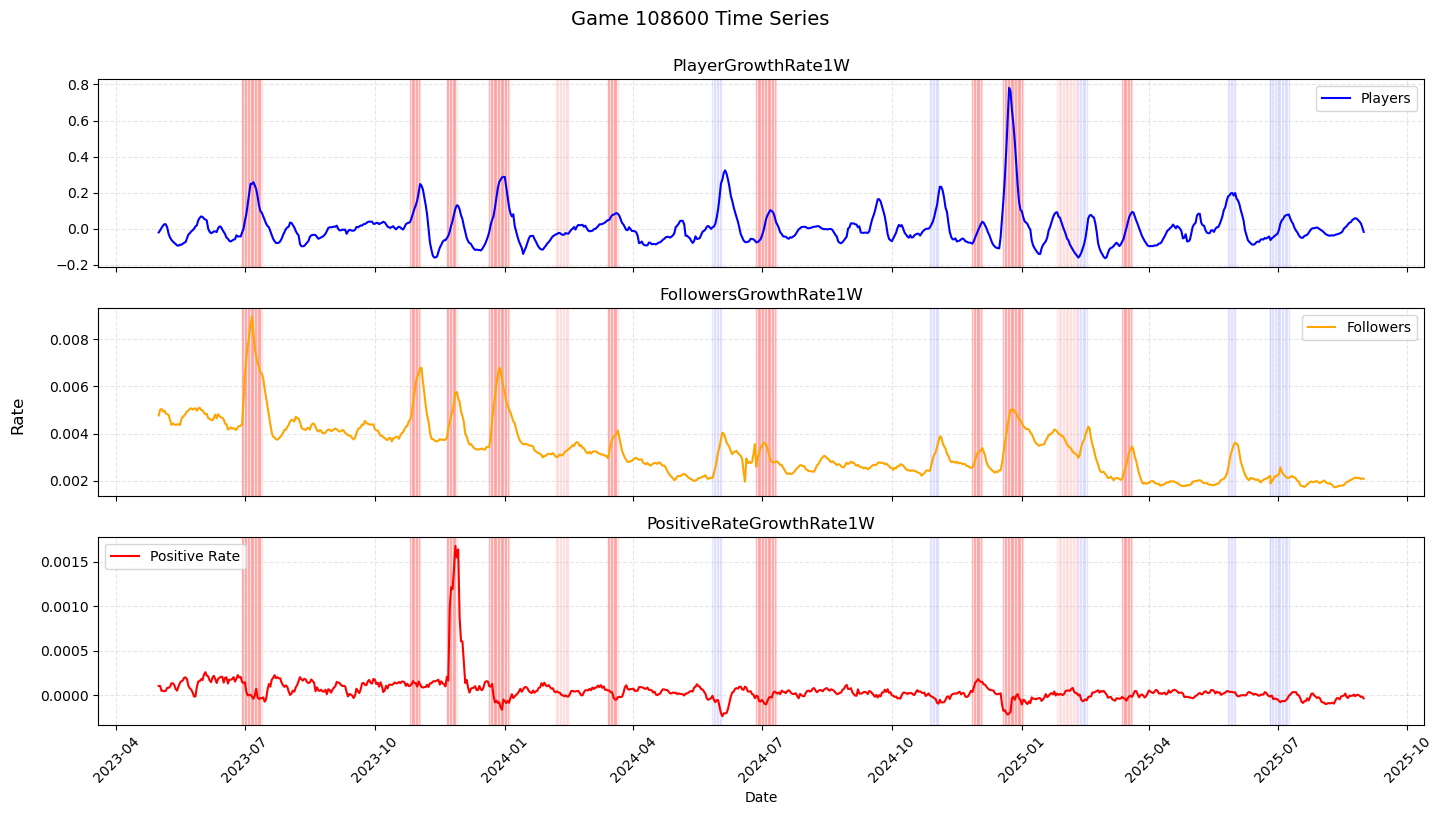

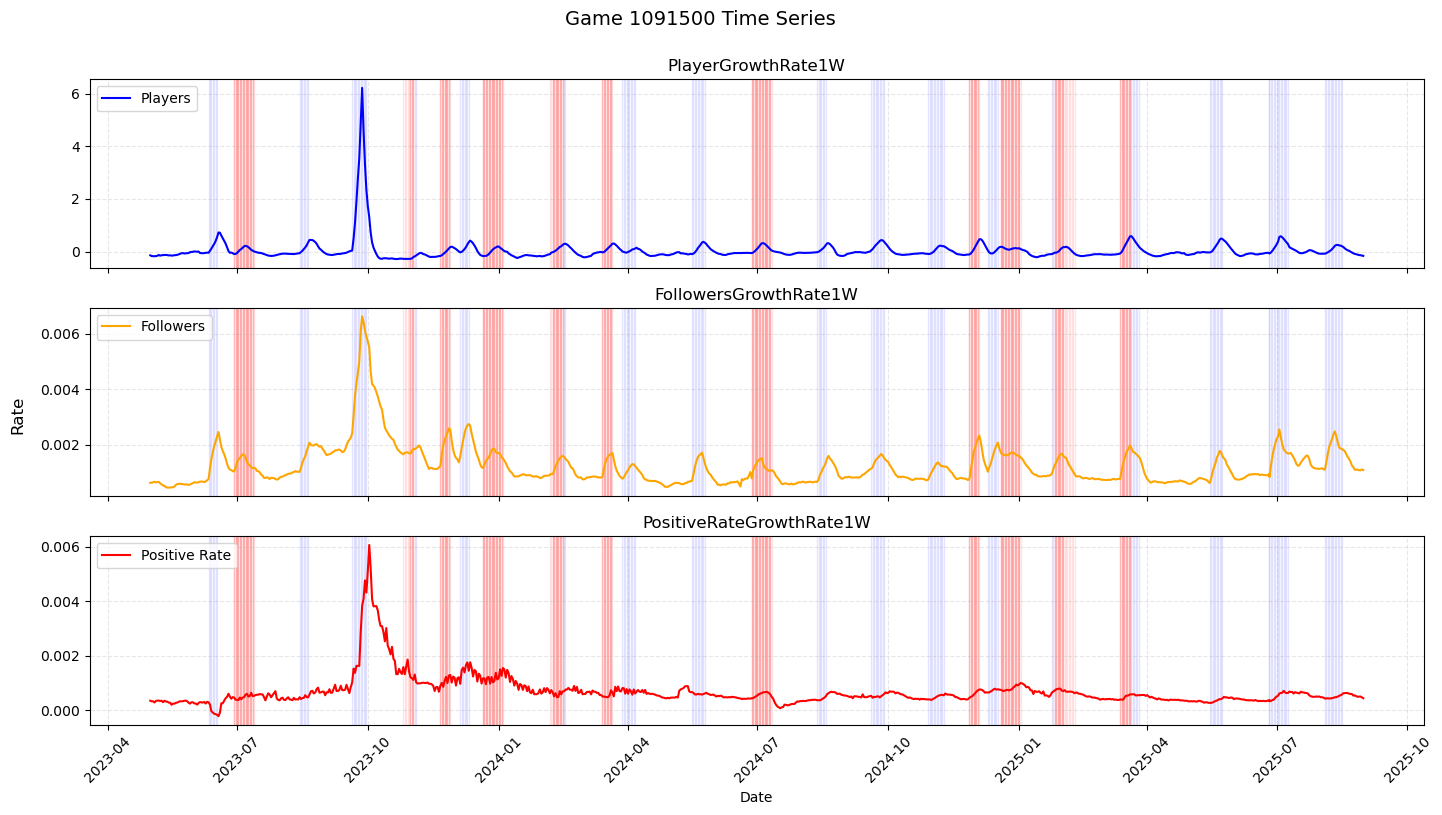

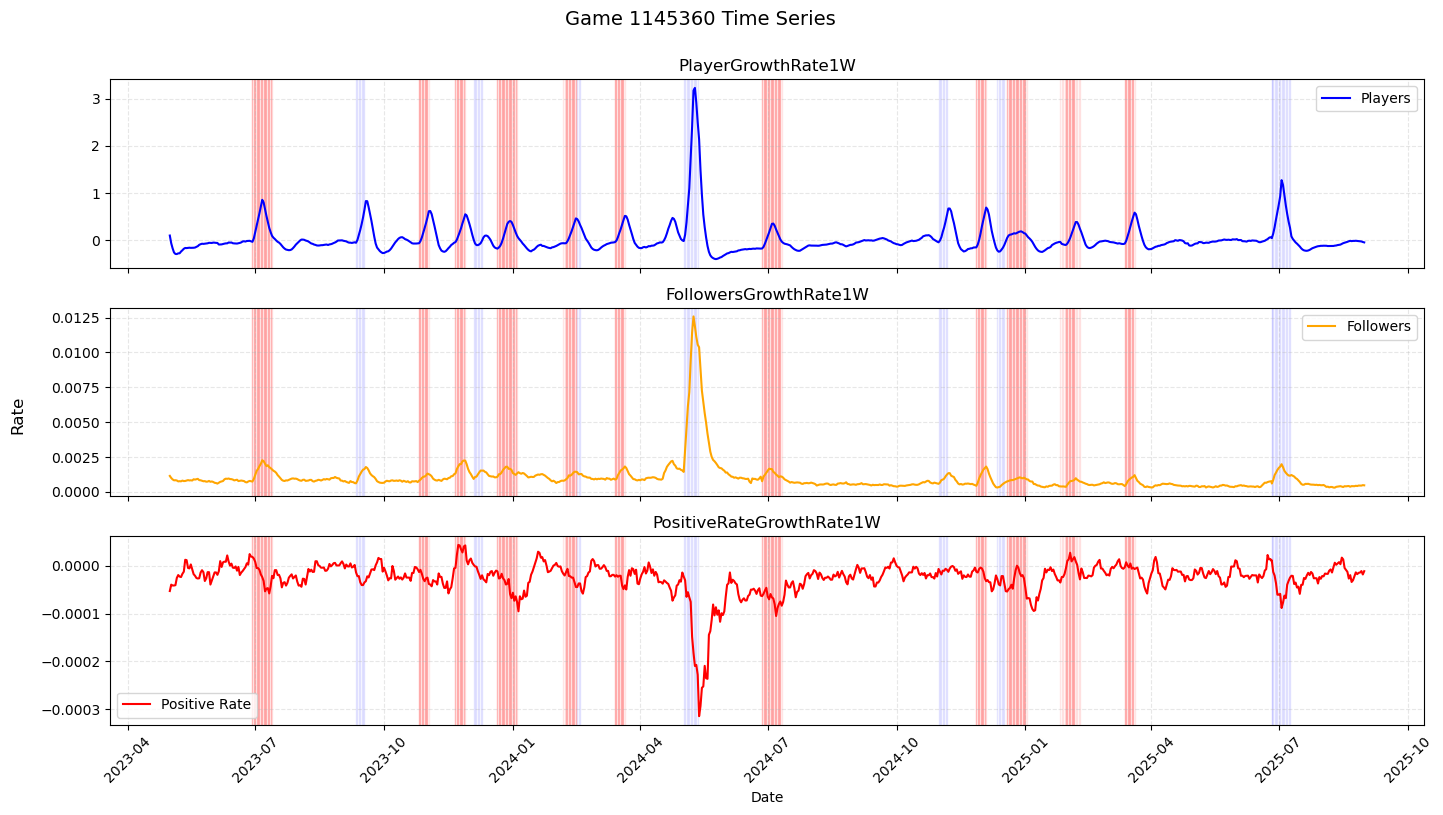

C:\Users\10610\AppData\Local\Temp\ipykernel_12972\4049599839.py:40: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])  # 保留空間給標題和y標籤
c:\Users\10610\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


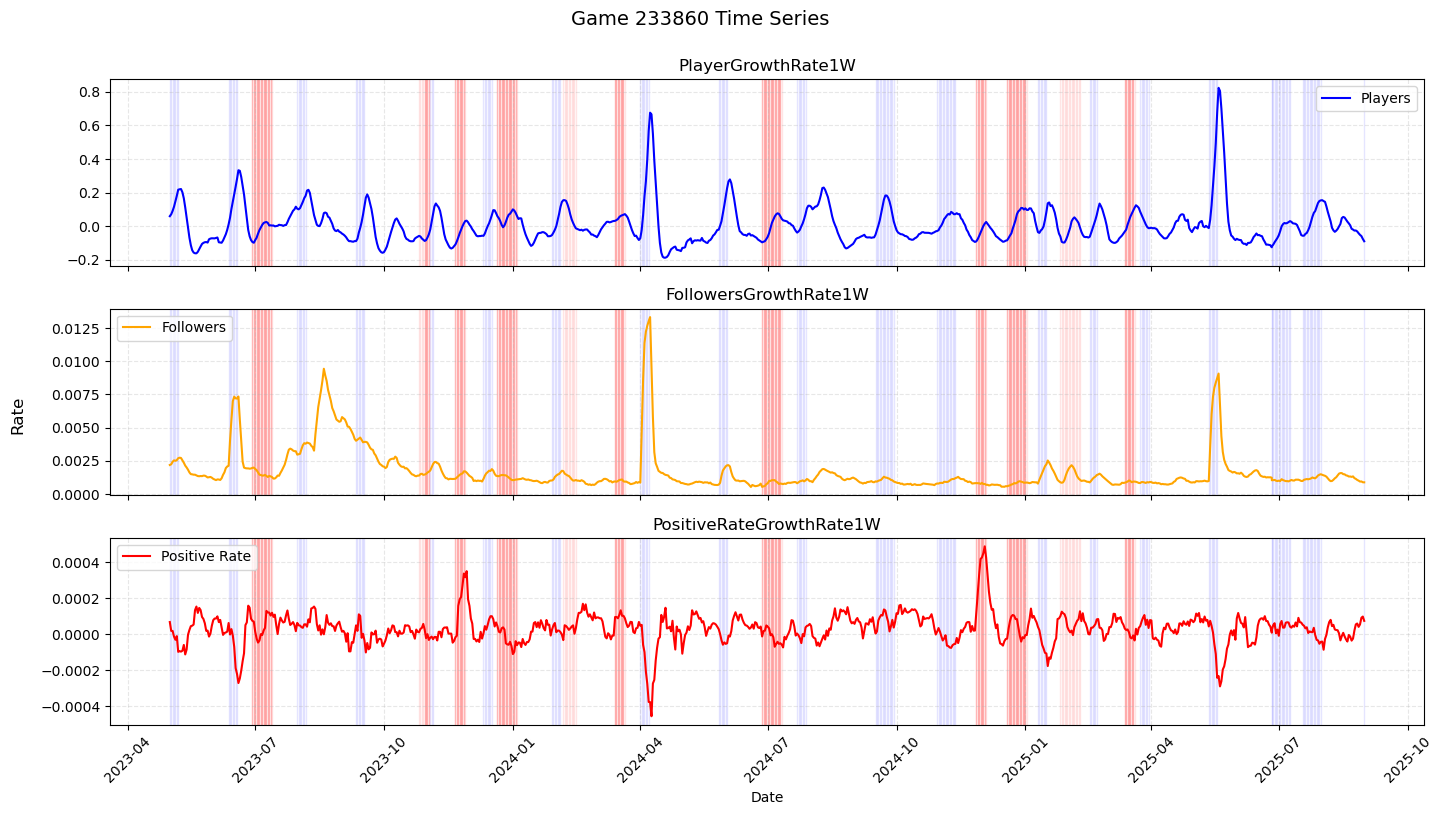

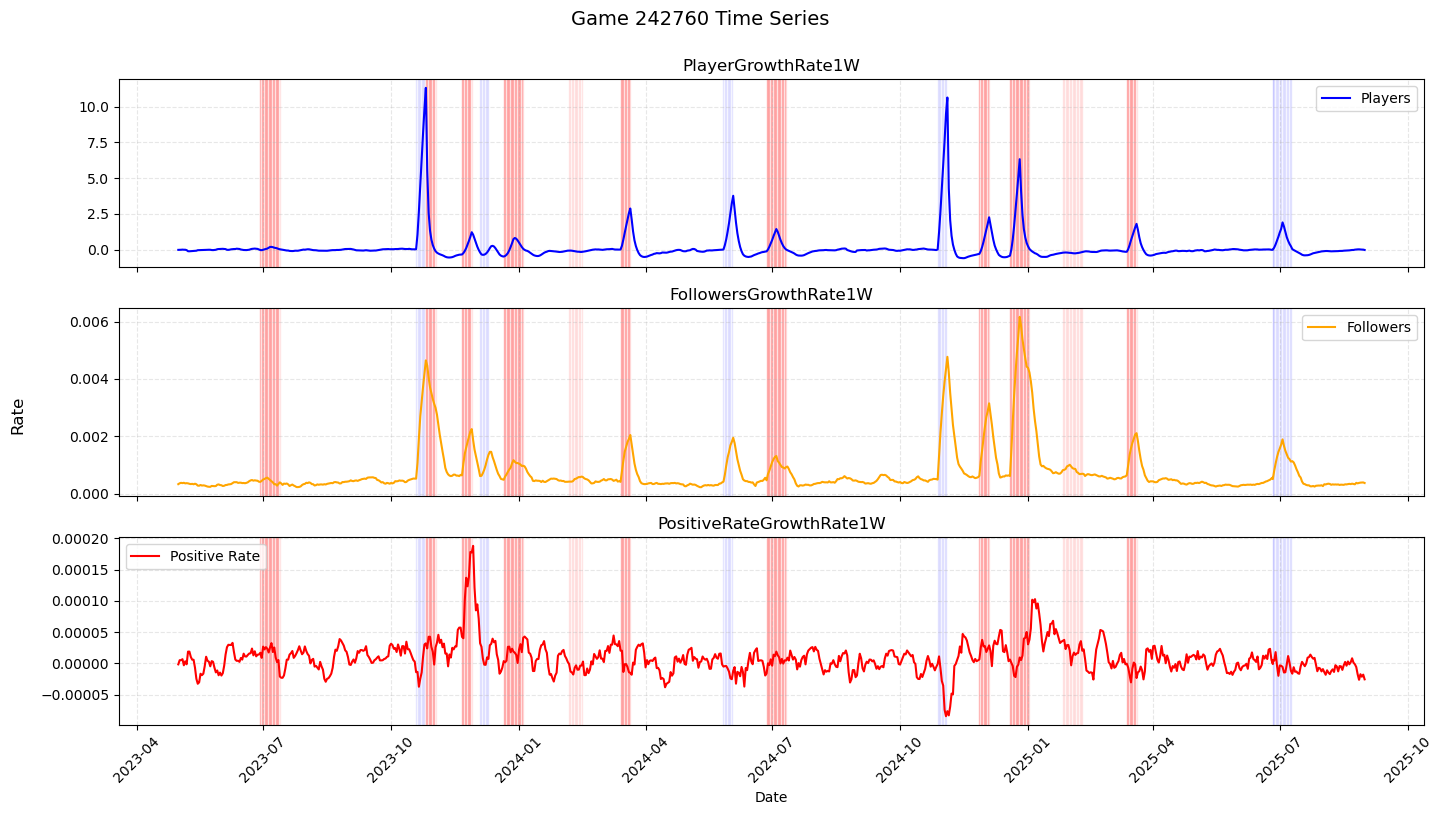

c:\Users\10610\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


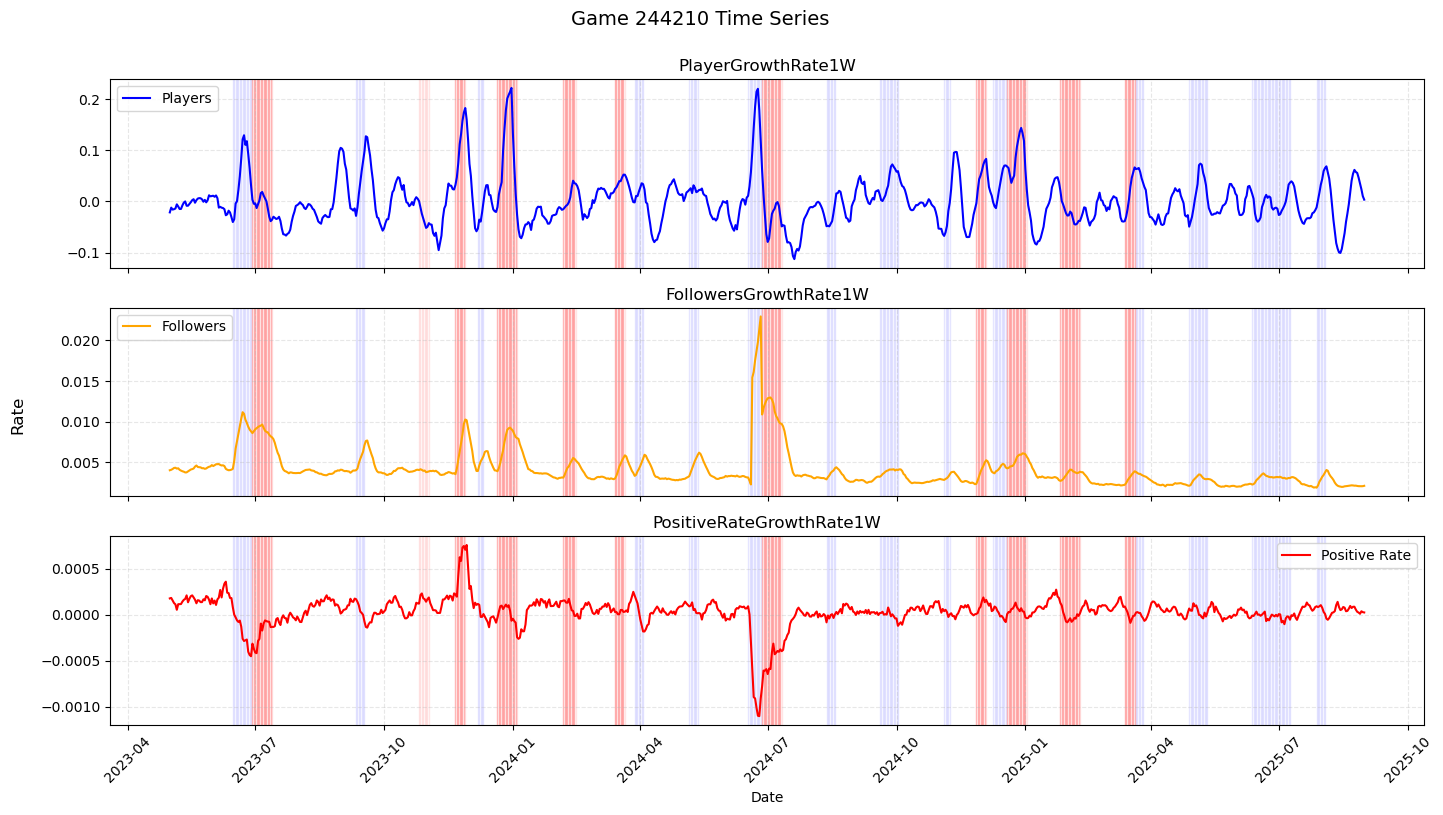

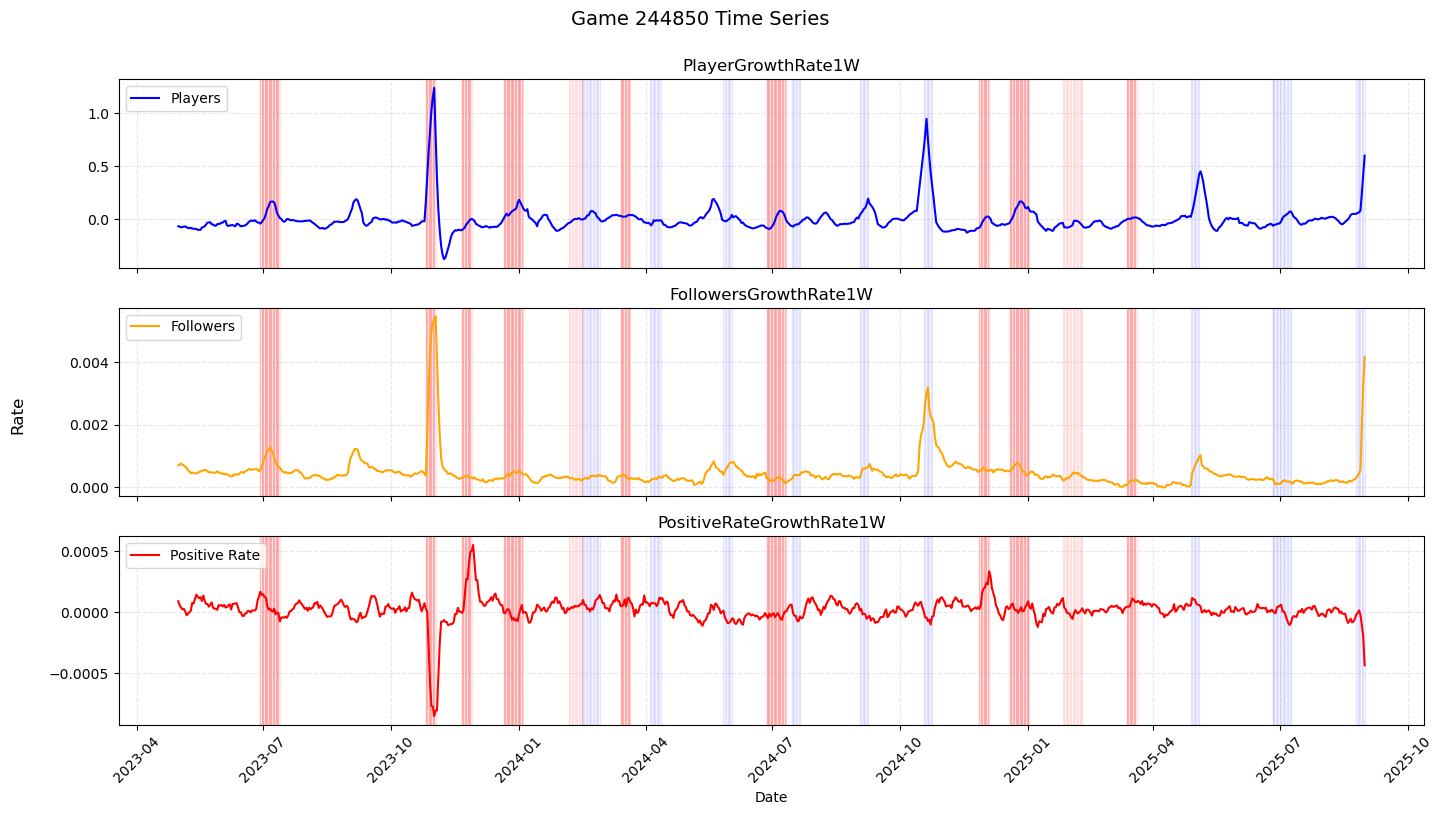

C:\Users\10610\AppData\Local\Temp\ipykernel_12972\4049599839.py:40: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])  # 保留空間給標題和y標籤


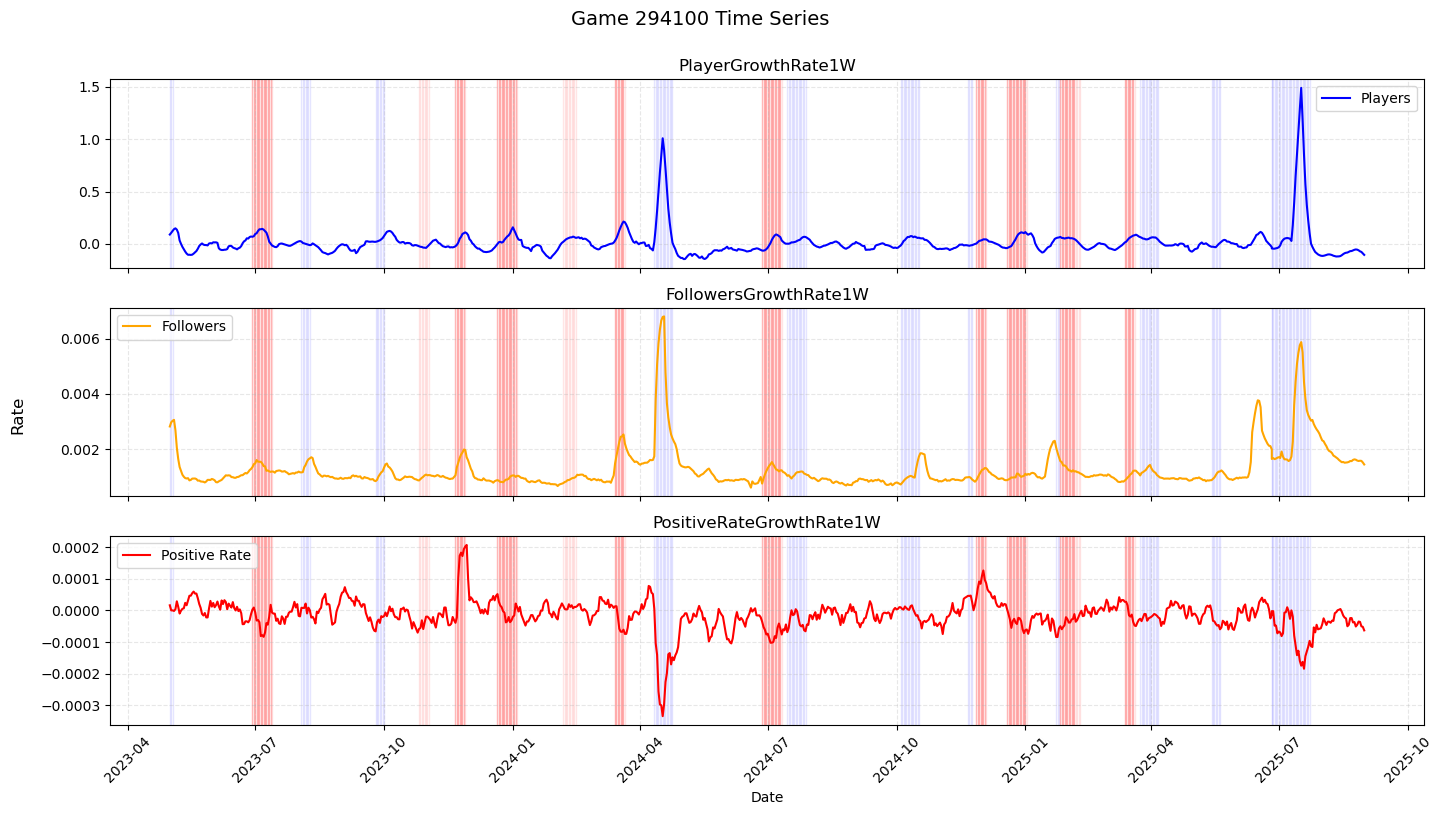

C:\Users\10610\AppData\Local\Temp\ipykernel_12972\4049599839.py:40: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])  # 保留空間給標題和y標籤
c:\Users\10610\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


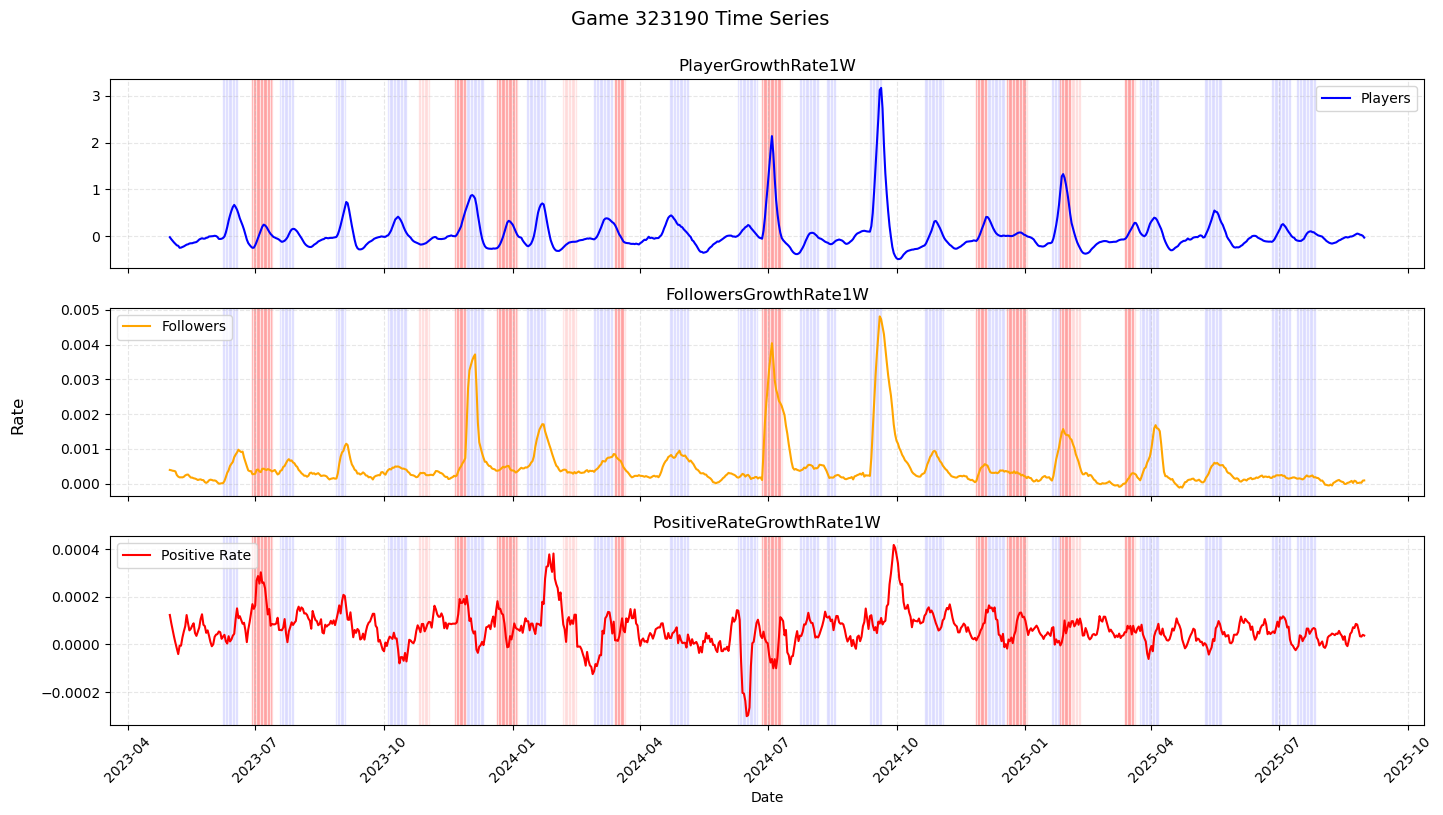

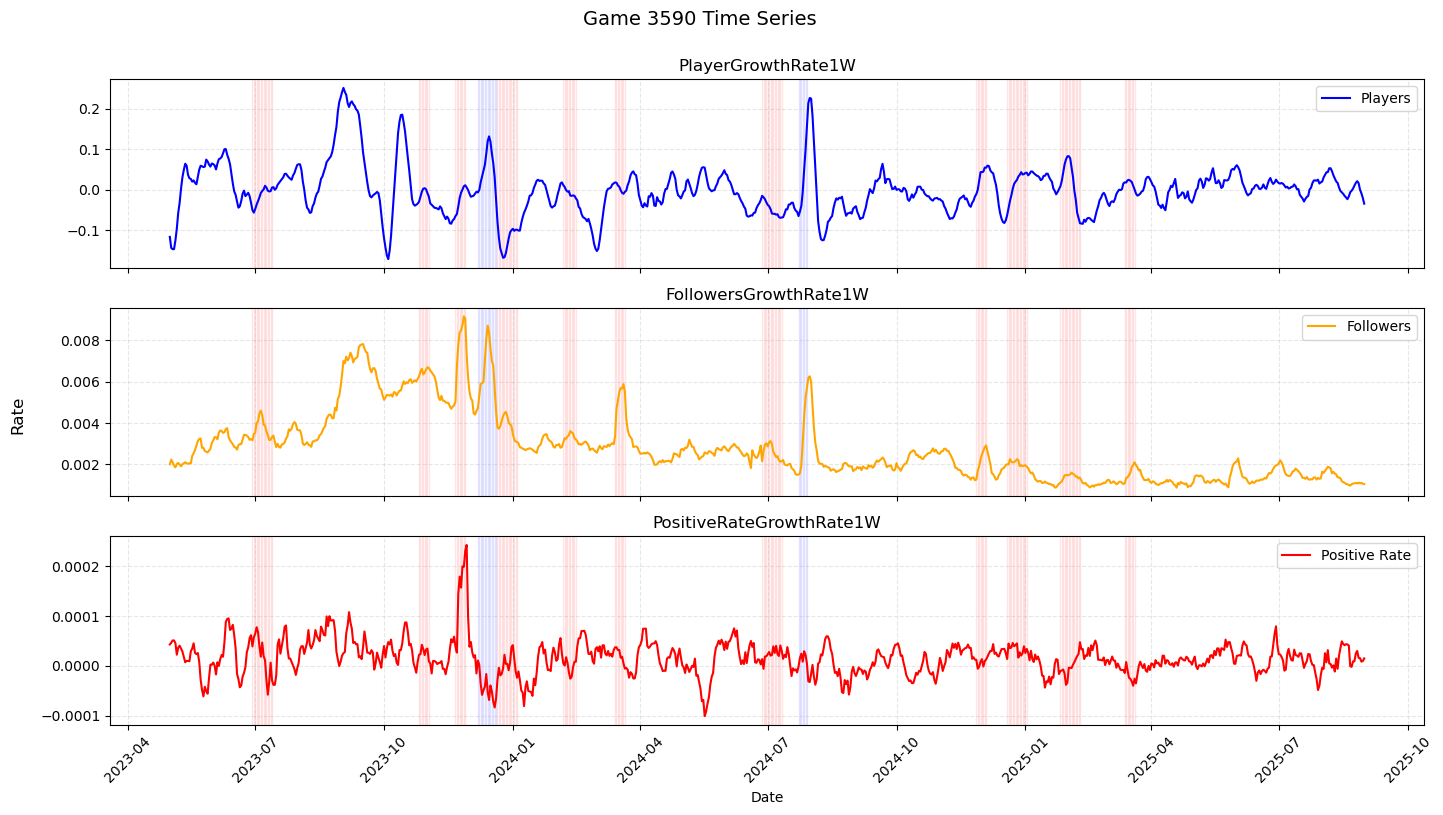

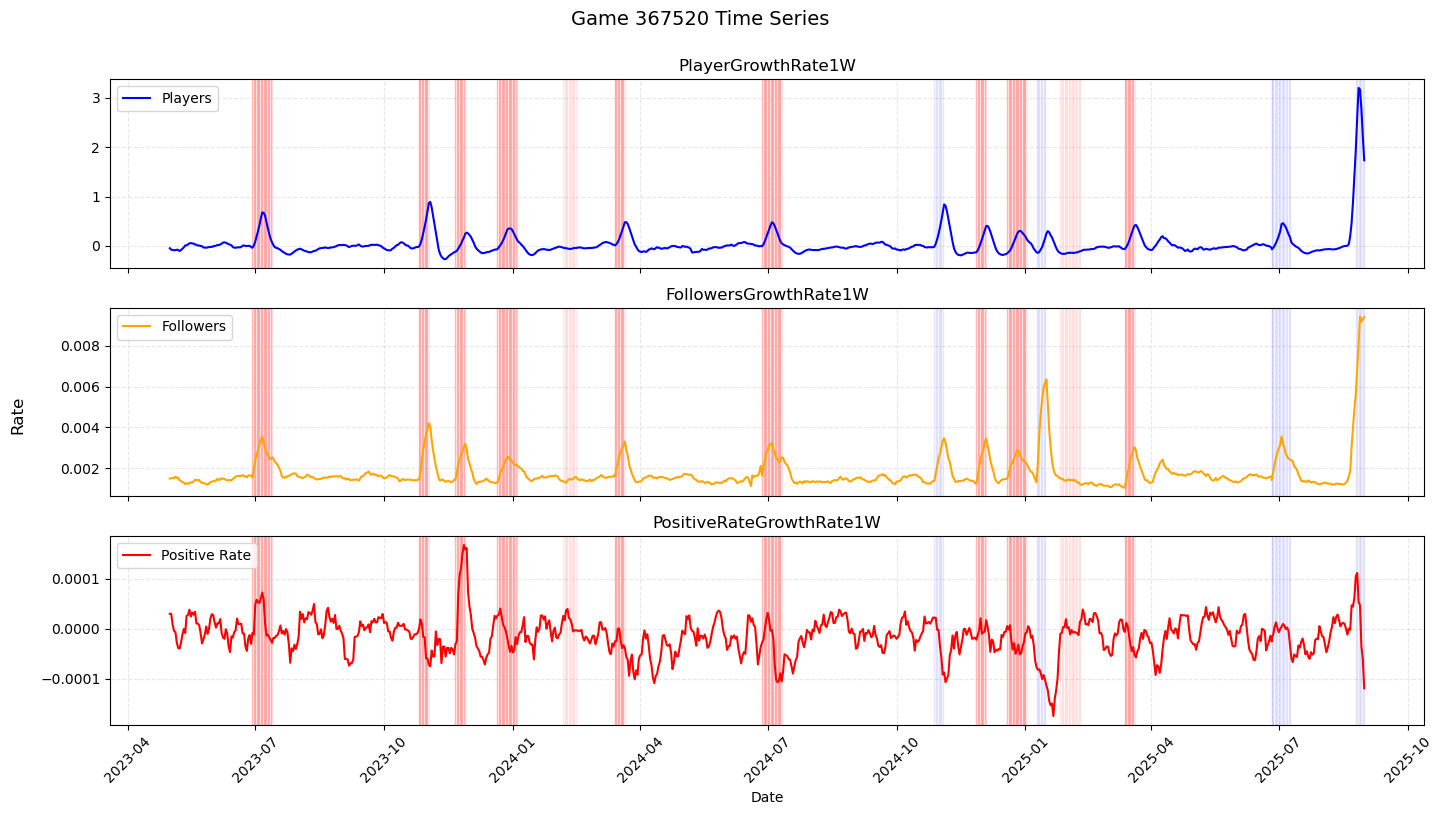

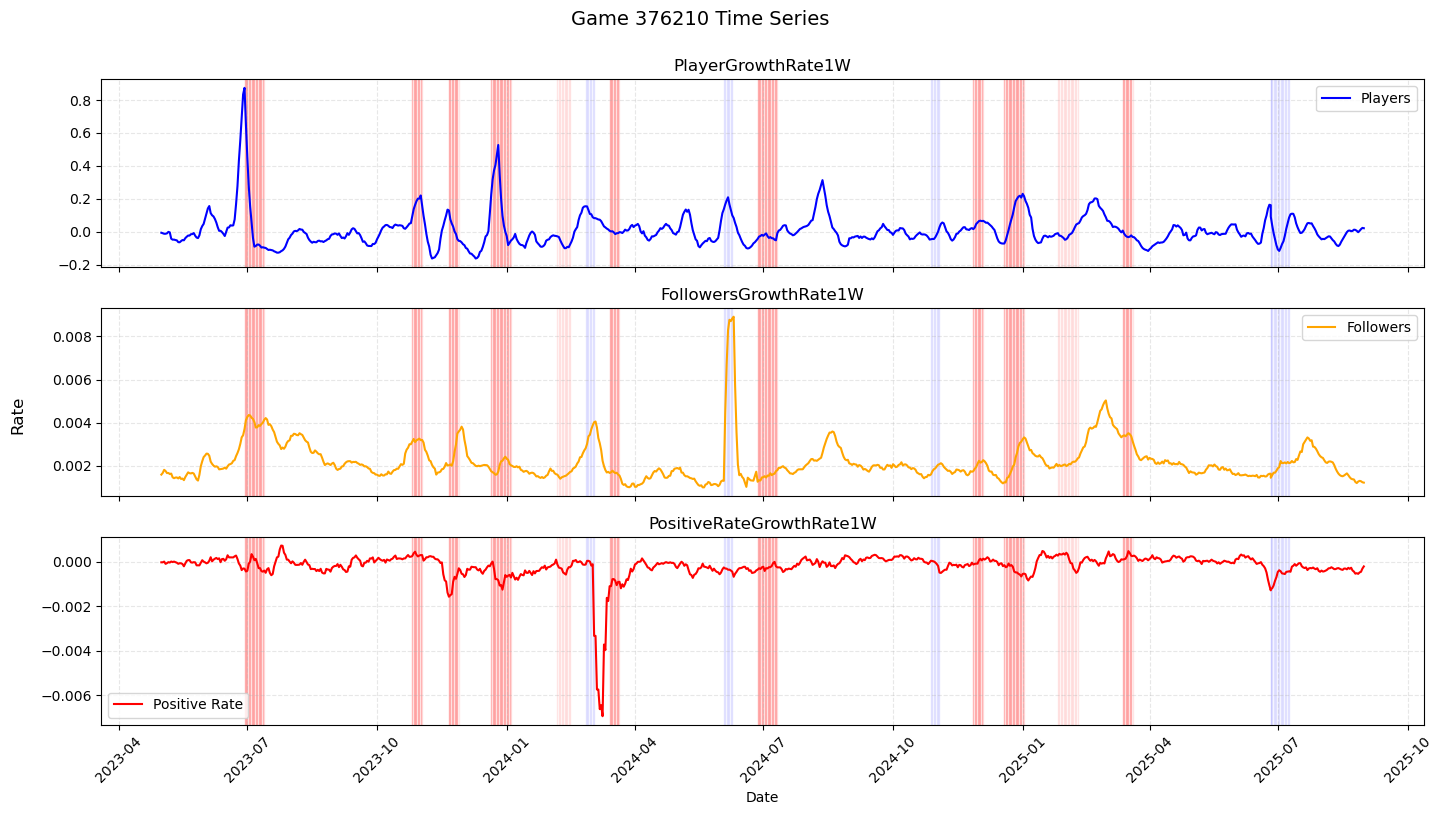

C:\Users\10610\AppData\Local\Temp\ipykernel_12972\4049599839.py:40: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])  # 保留空間給標題和y標籤


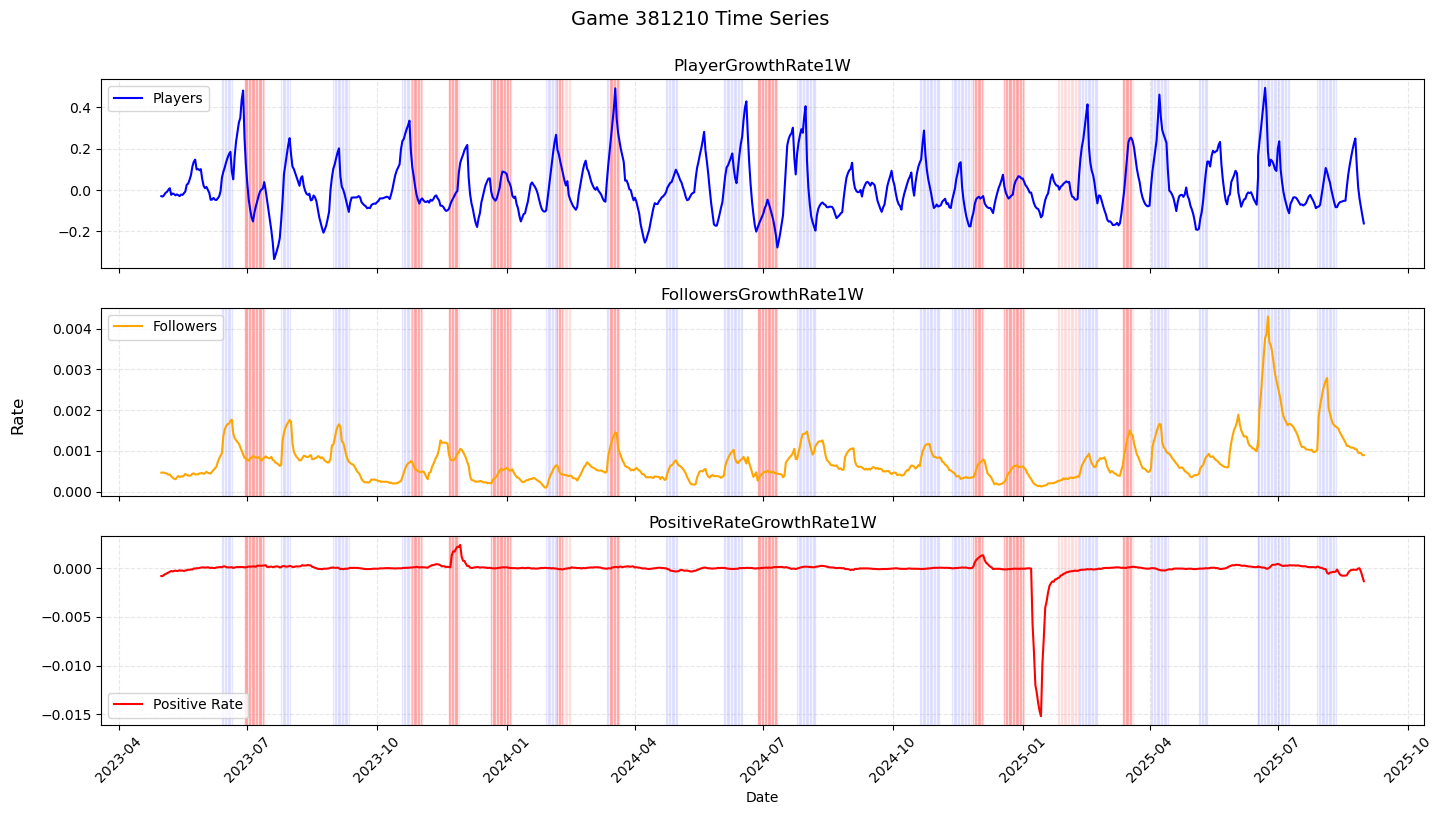

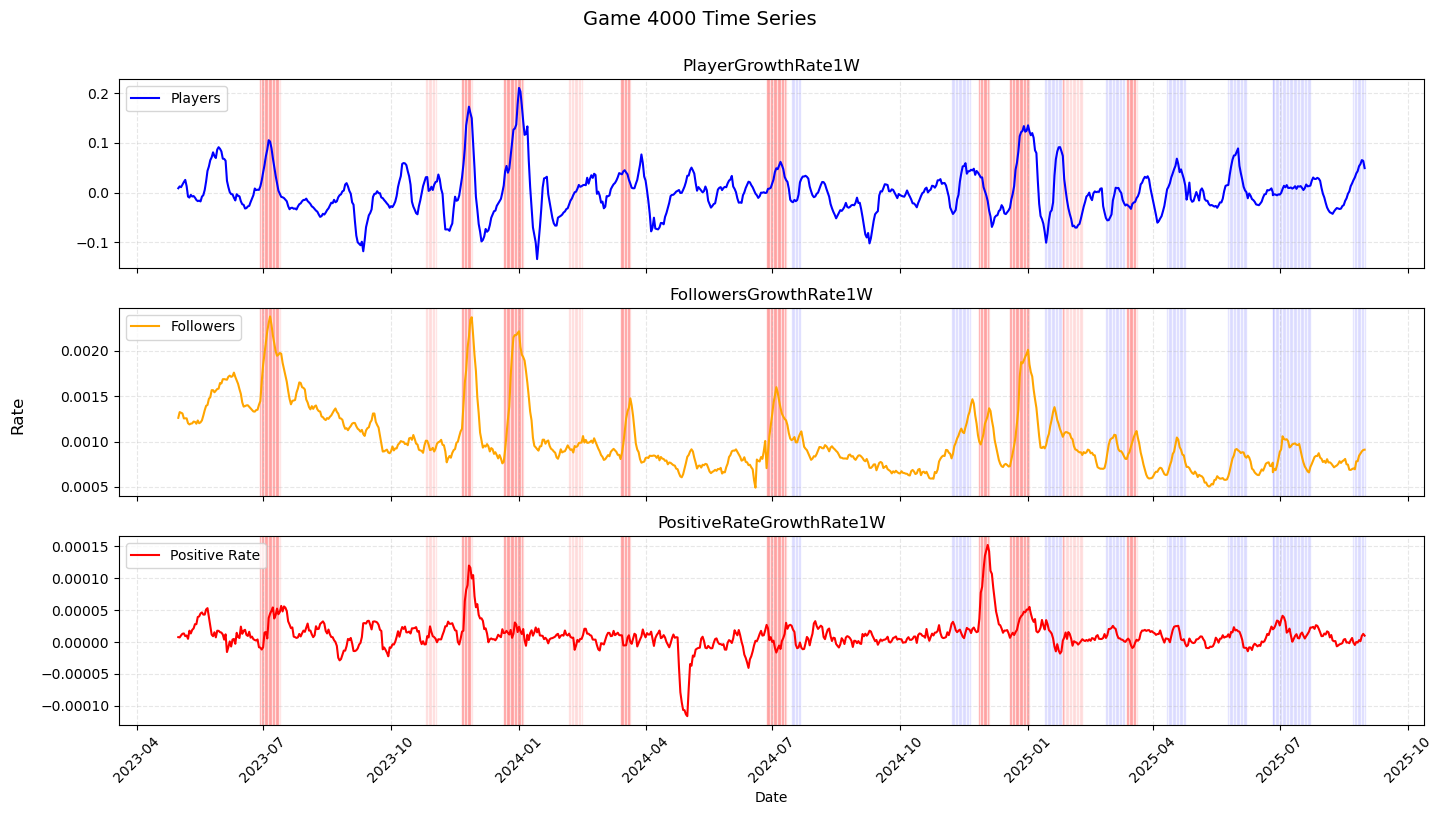

c:\Users\10610\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


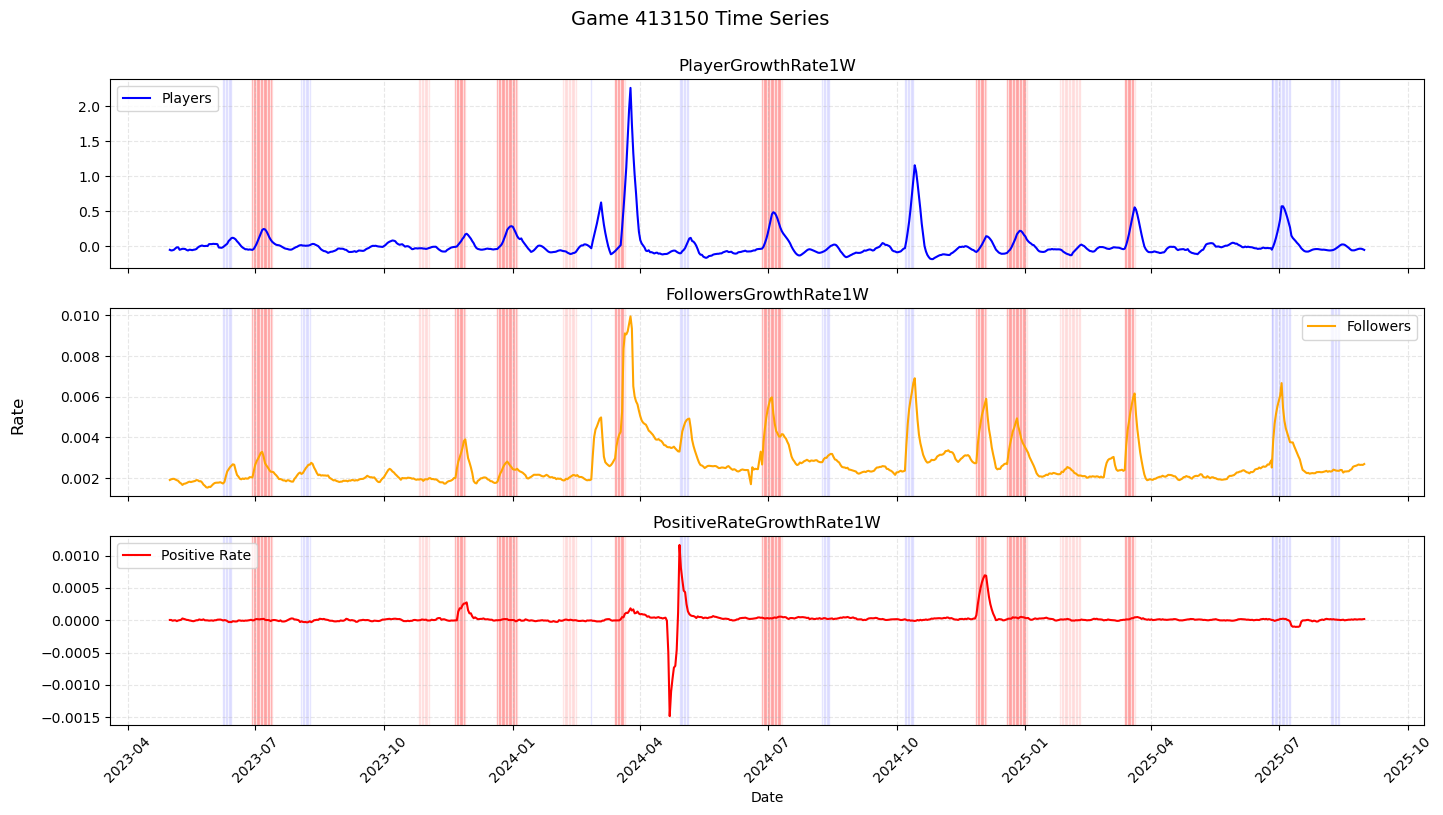

C:\Users\10610\AppData\Local\Temp\ipykernel_12972\4049599839.py:40: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])  # 保留空間給標題和y標籤
c:\Users\10610\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


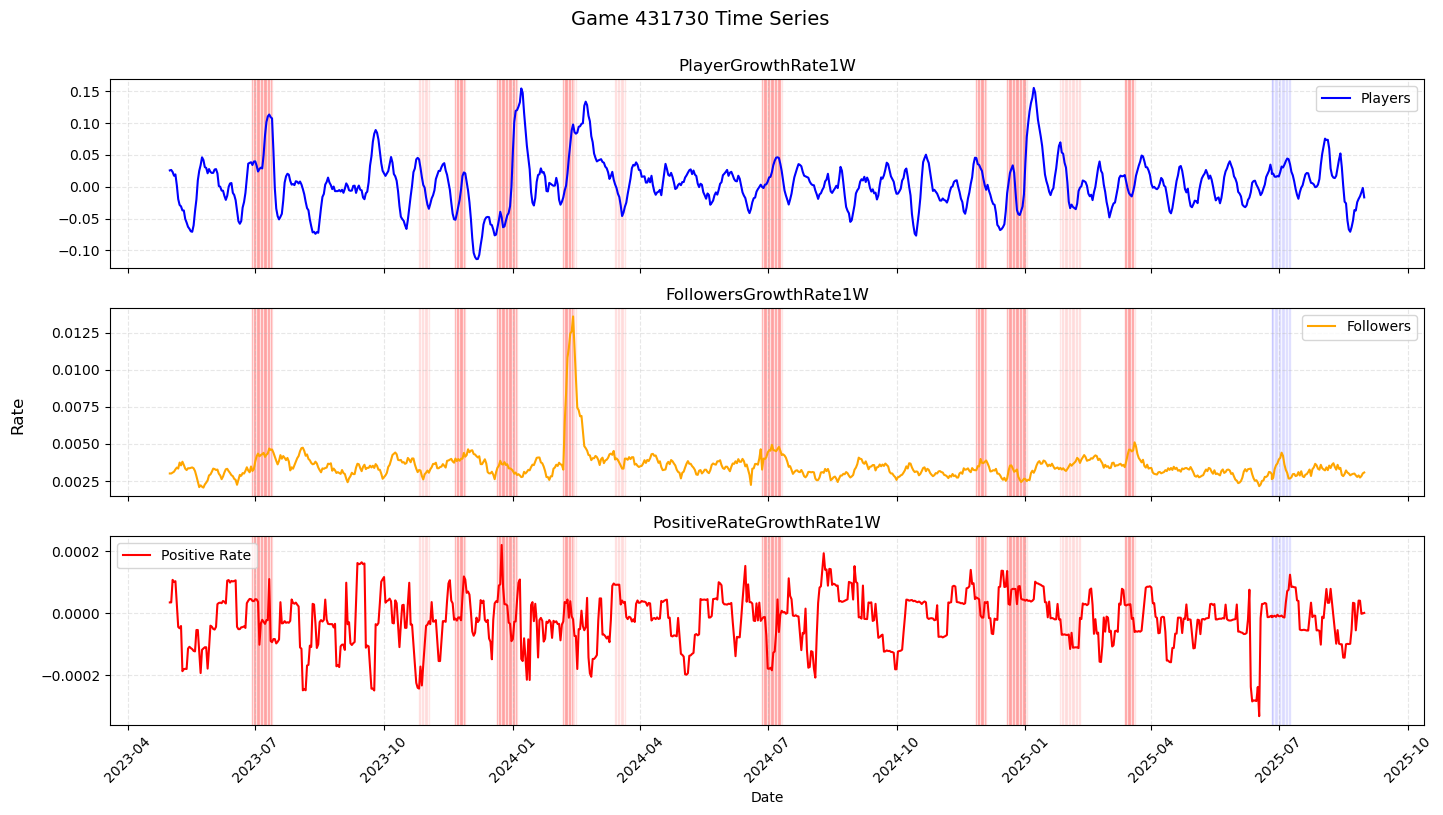

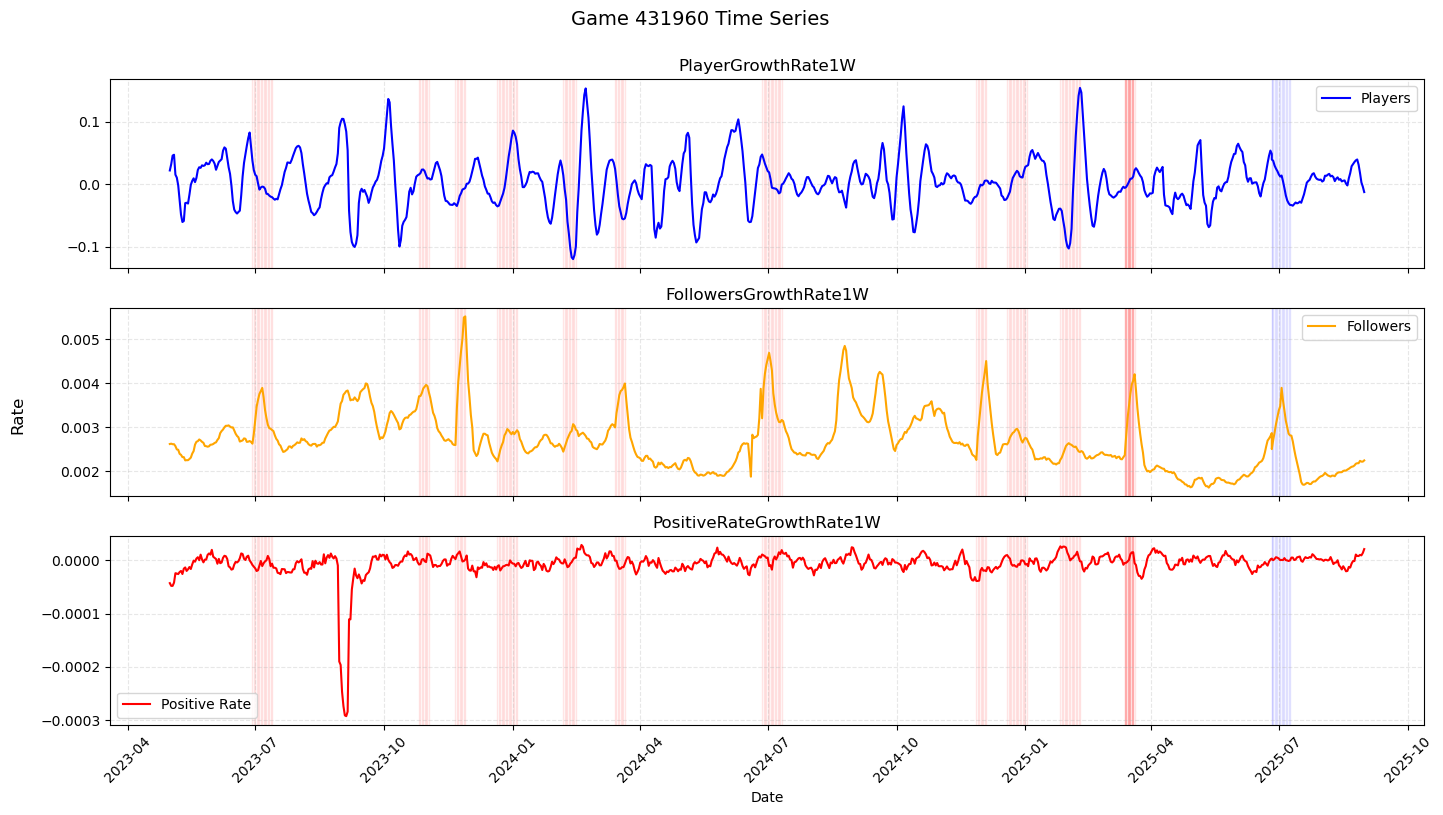

c:\Users\10610\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


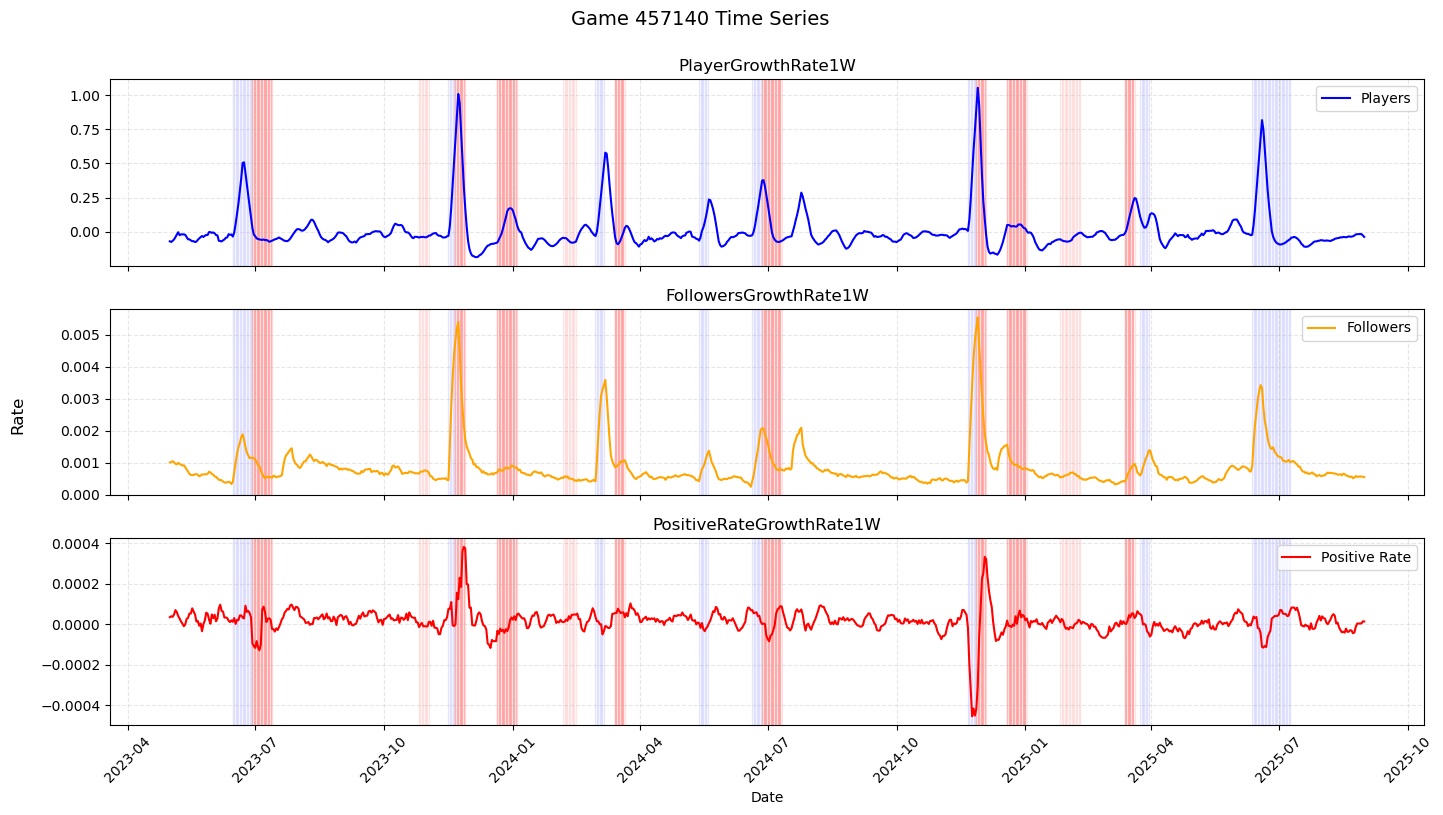

C:\Users\10610\AppData\Local\Temp\ipykernel_12972\4049599839.py:40: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])  # 保留空間給標題和y標籤
c:\Users\10610\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


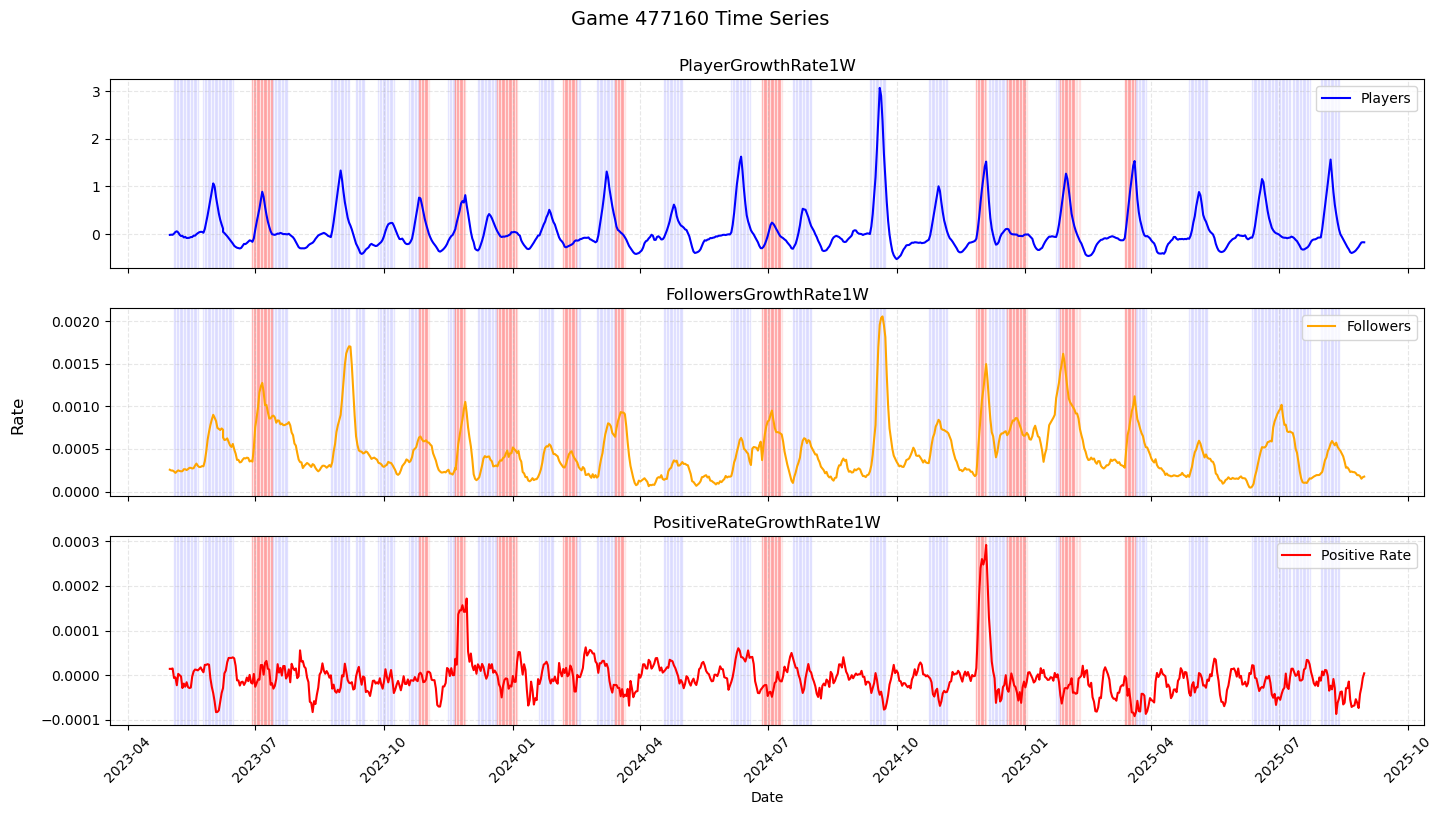

C:\Users\10610\AppData\Local\Temp\ipykernel_12972\4049599839.py:40: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])  # 保留空間給標題和y標籤
c:\Users\10610\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


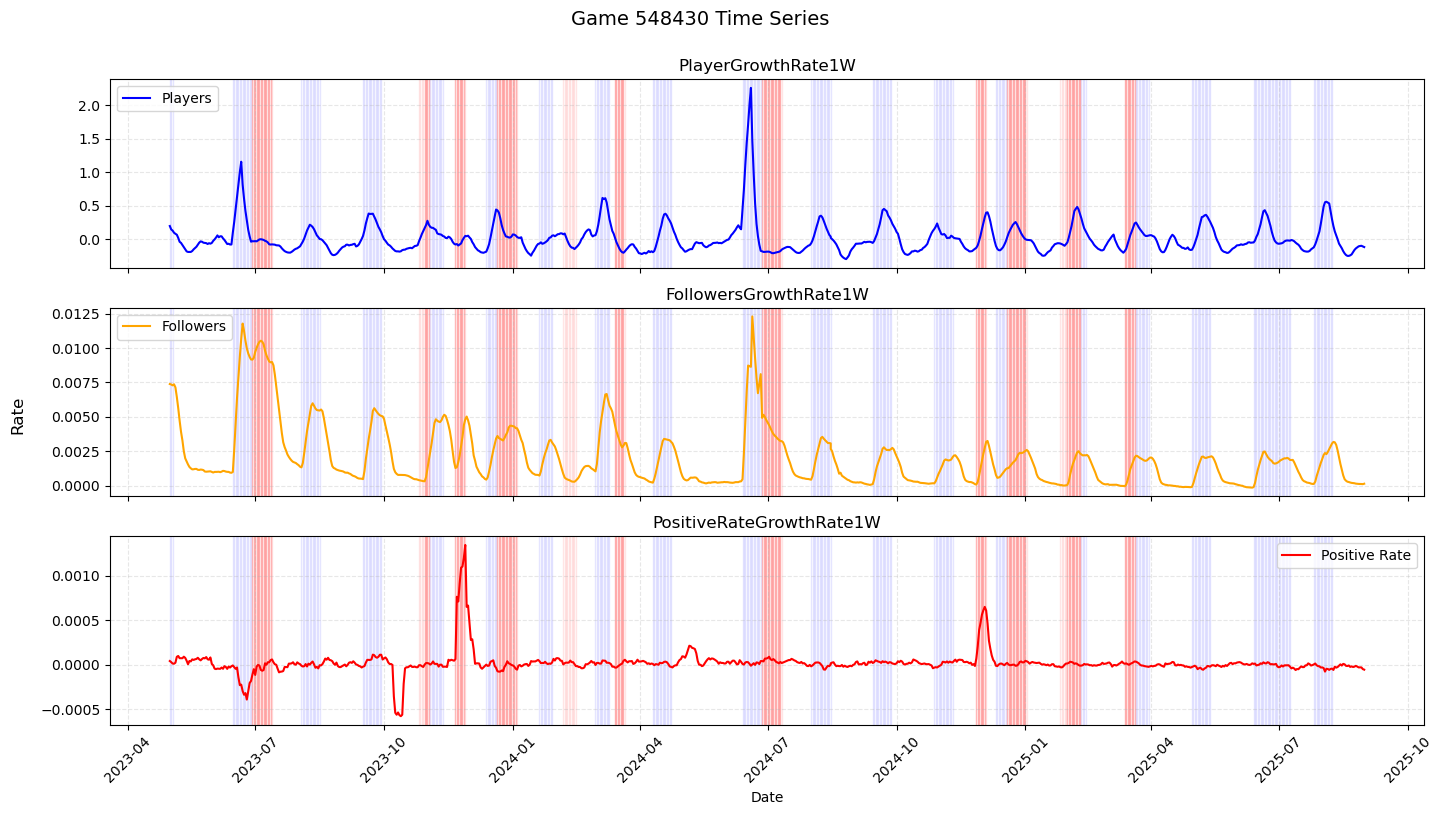

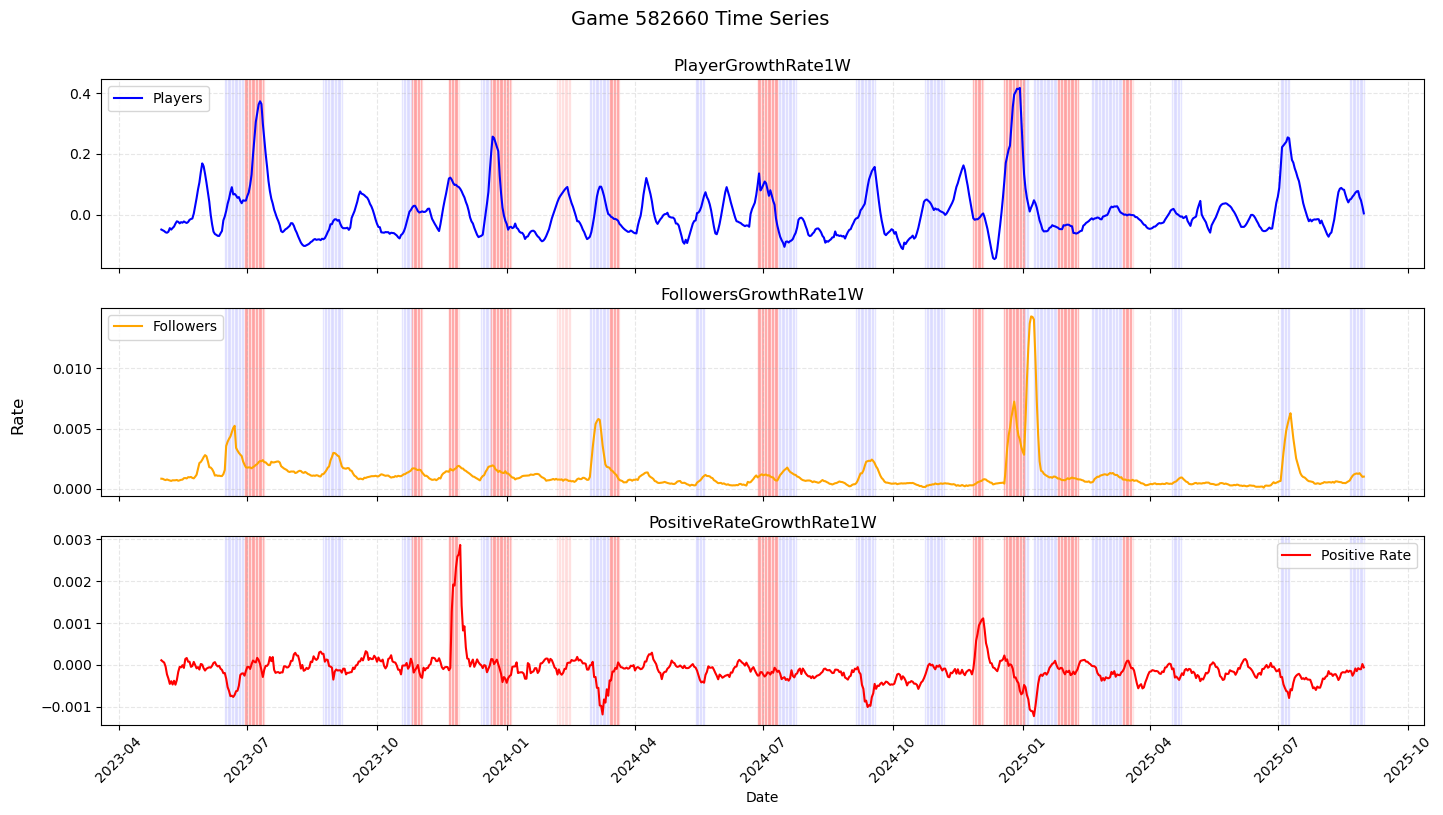

c:\Users\10610\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


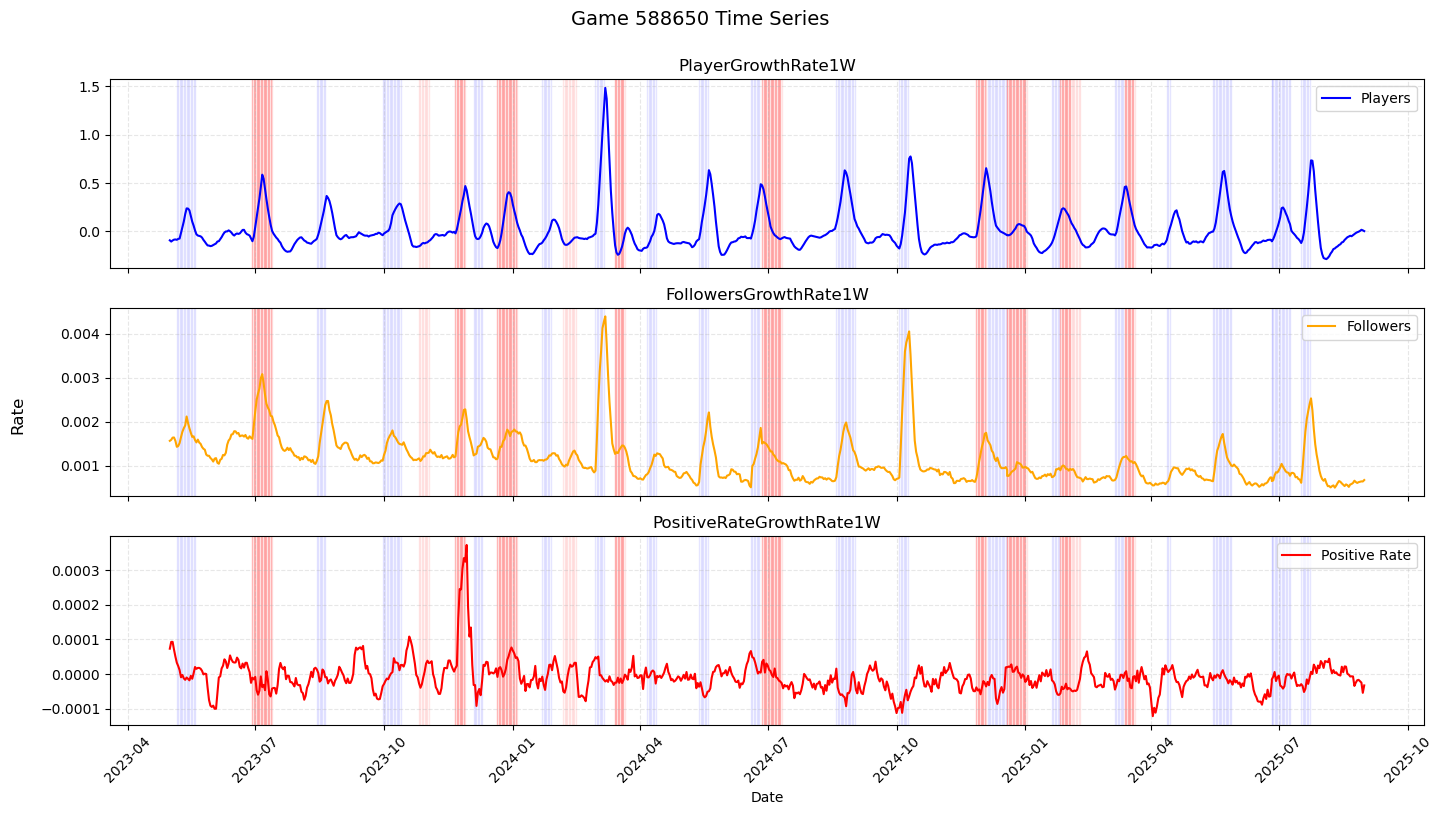

C:\Users\10610\AppData\Local\Temp\ipykernel_12972\4049599839.py:40: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])  # 保留空間給標題和y標籤


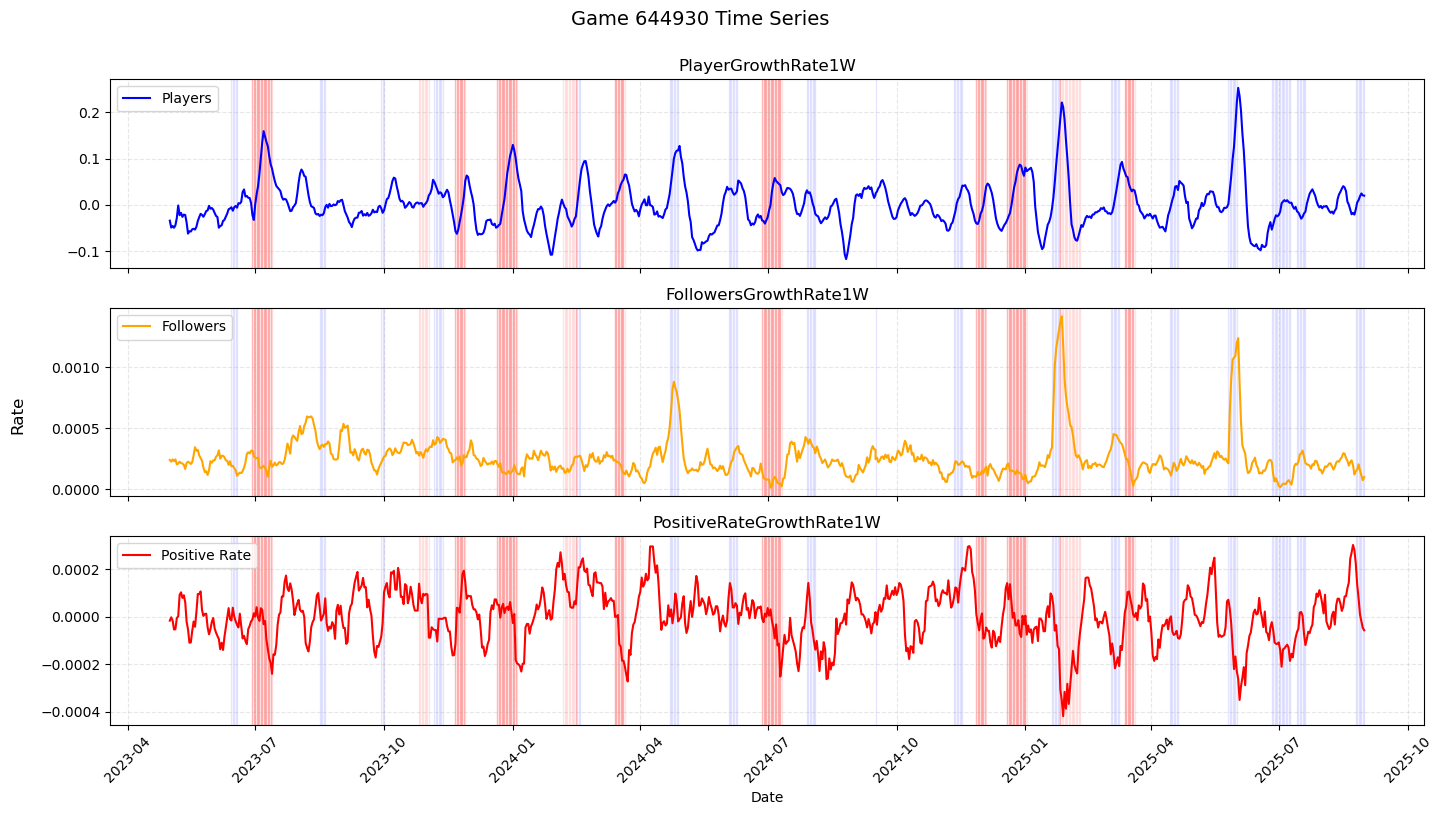

C:\Users\10610\AppData\Local\Temp\ipykernel_12972\4049599839.py:40: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])  # 保留空間給標題和y標籤
c:\Users\10610\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


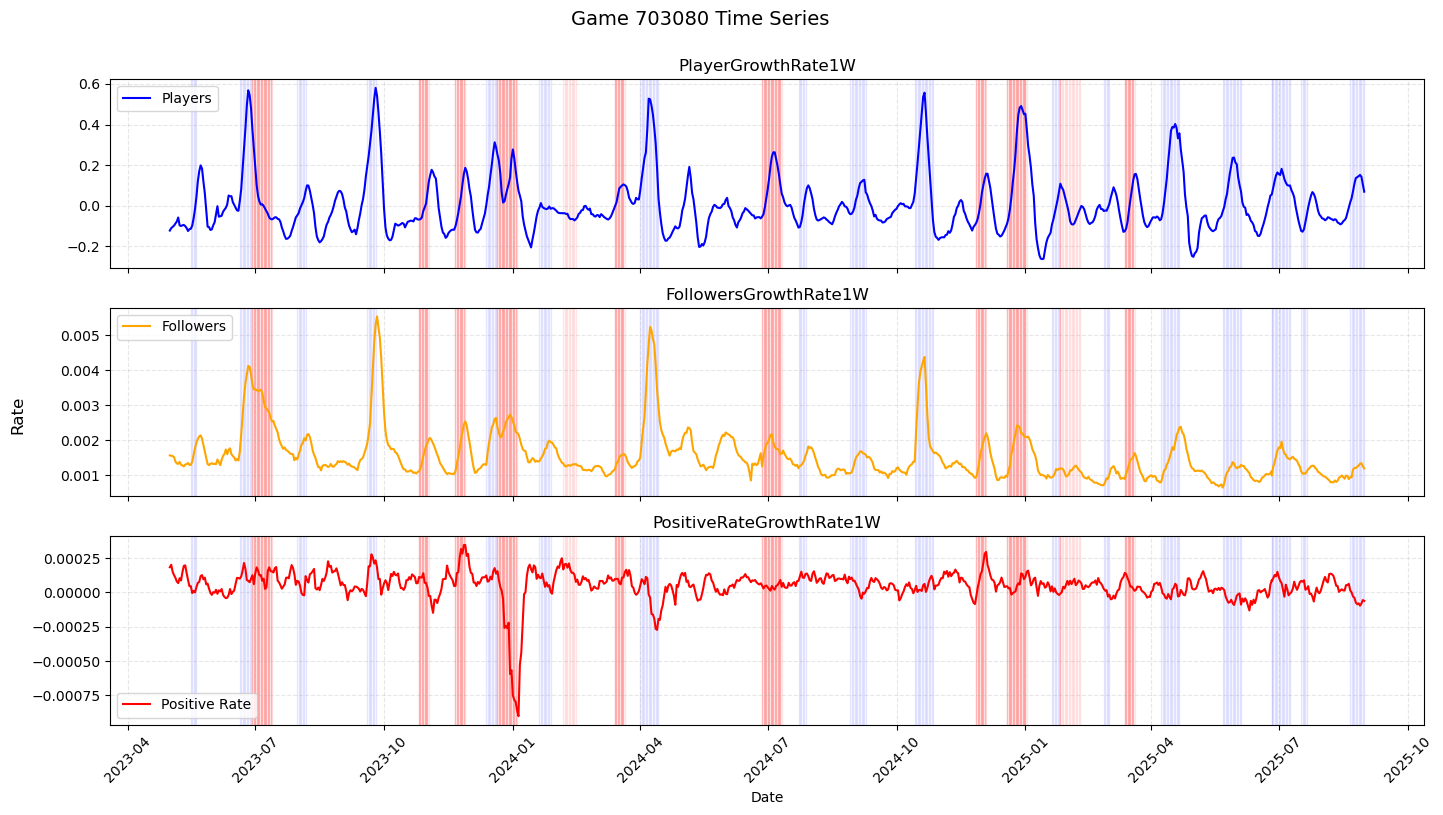

C:\Users\10610\AppData\Local\Temp\ipykernel_12972\4049599839.py:40: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])  # 保留空間給標題和y標籤
c:\Users\10610\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


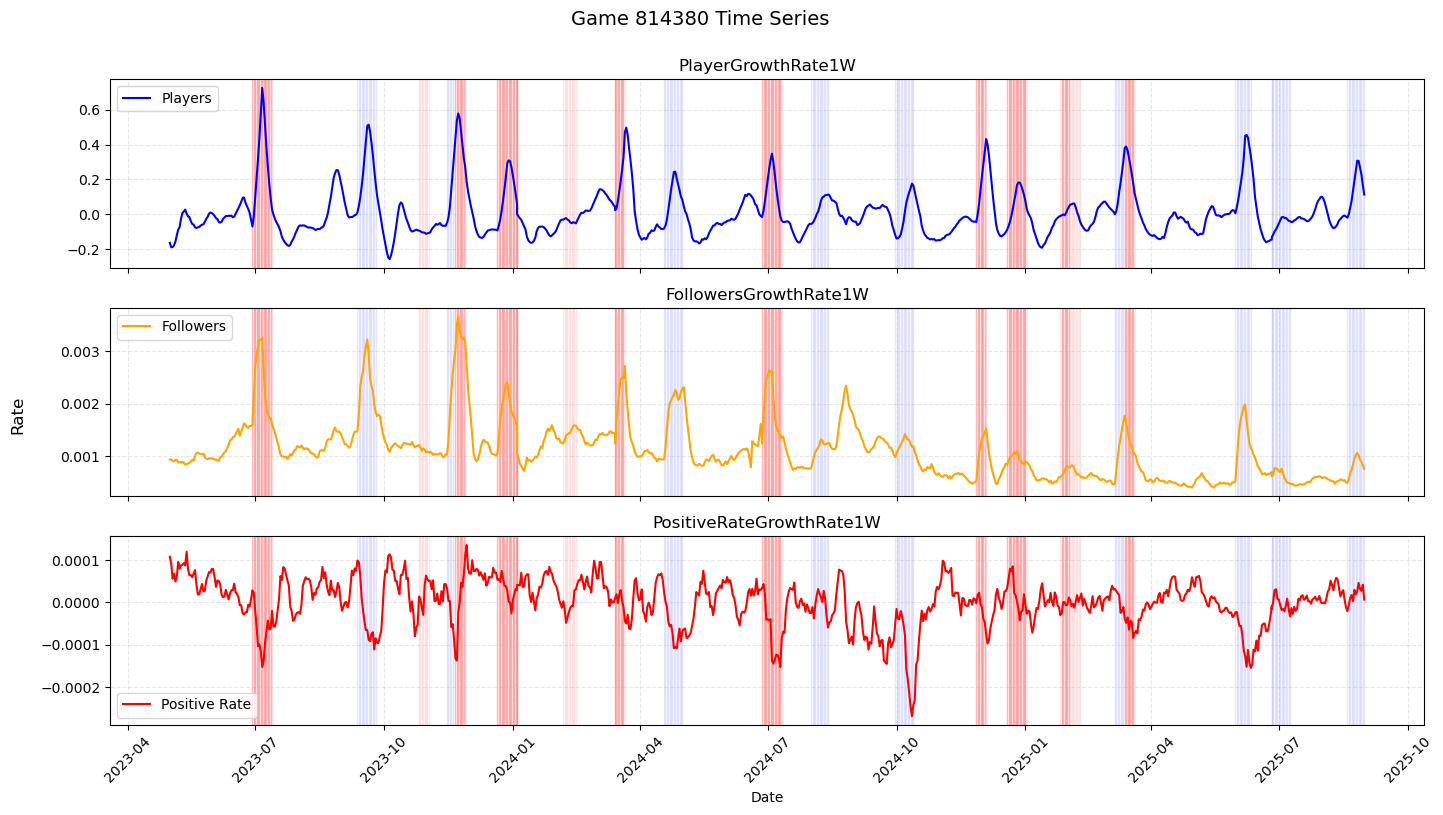

c:\Users\10610\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


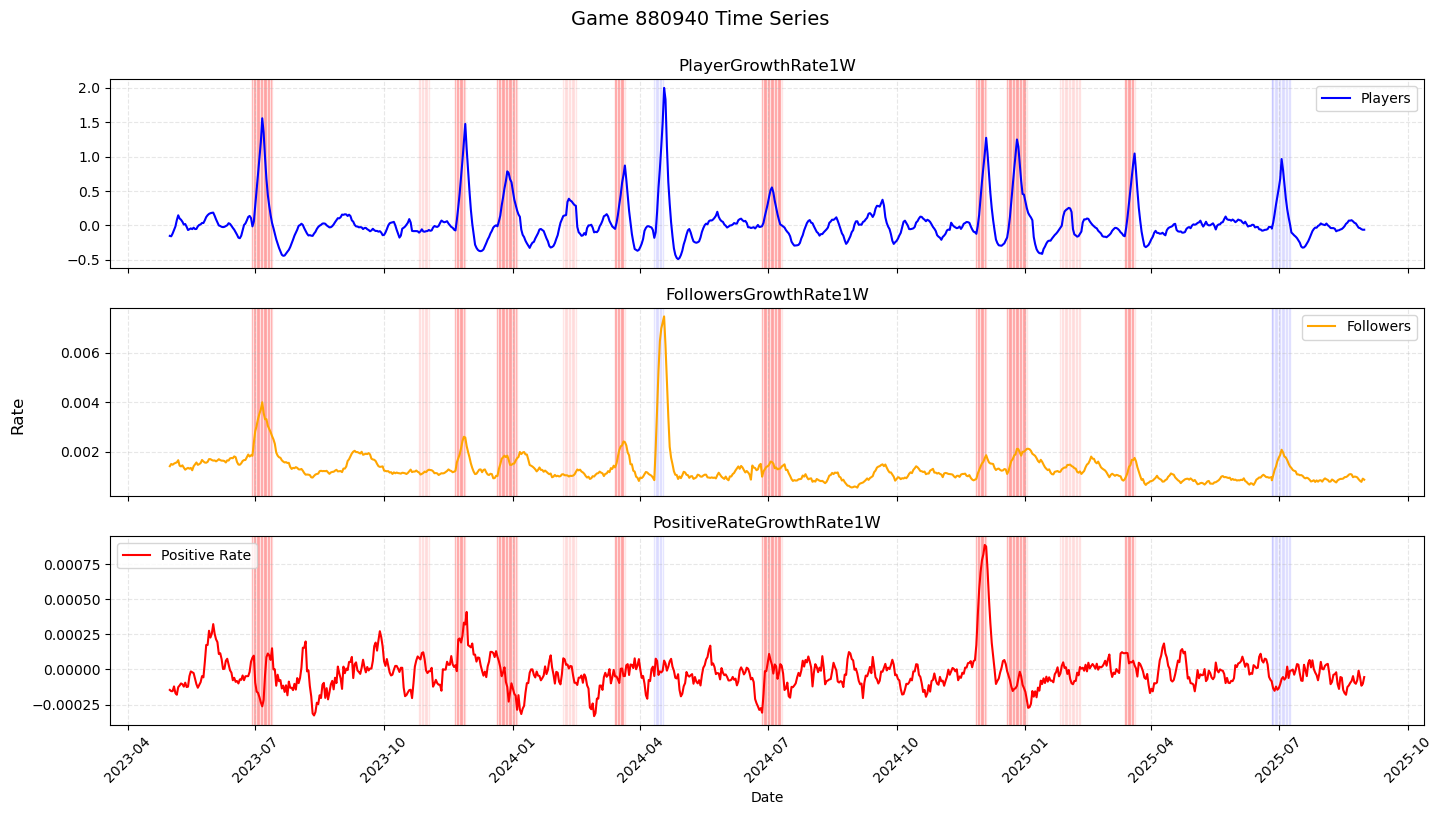

C:\Users\10610\AppData\Local\Temp\ipykernel_12972\4049599839.py:40: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])  # 保留空間給標題和y標籤
c:\Users\10610\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


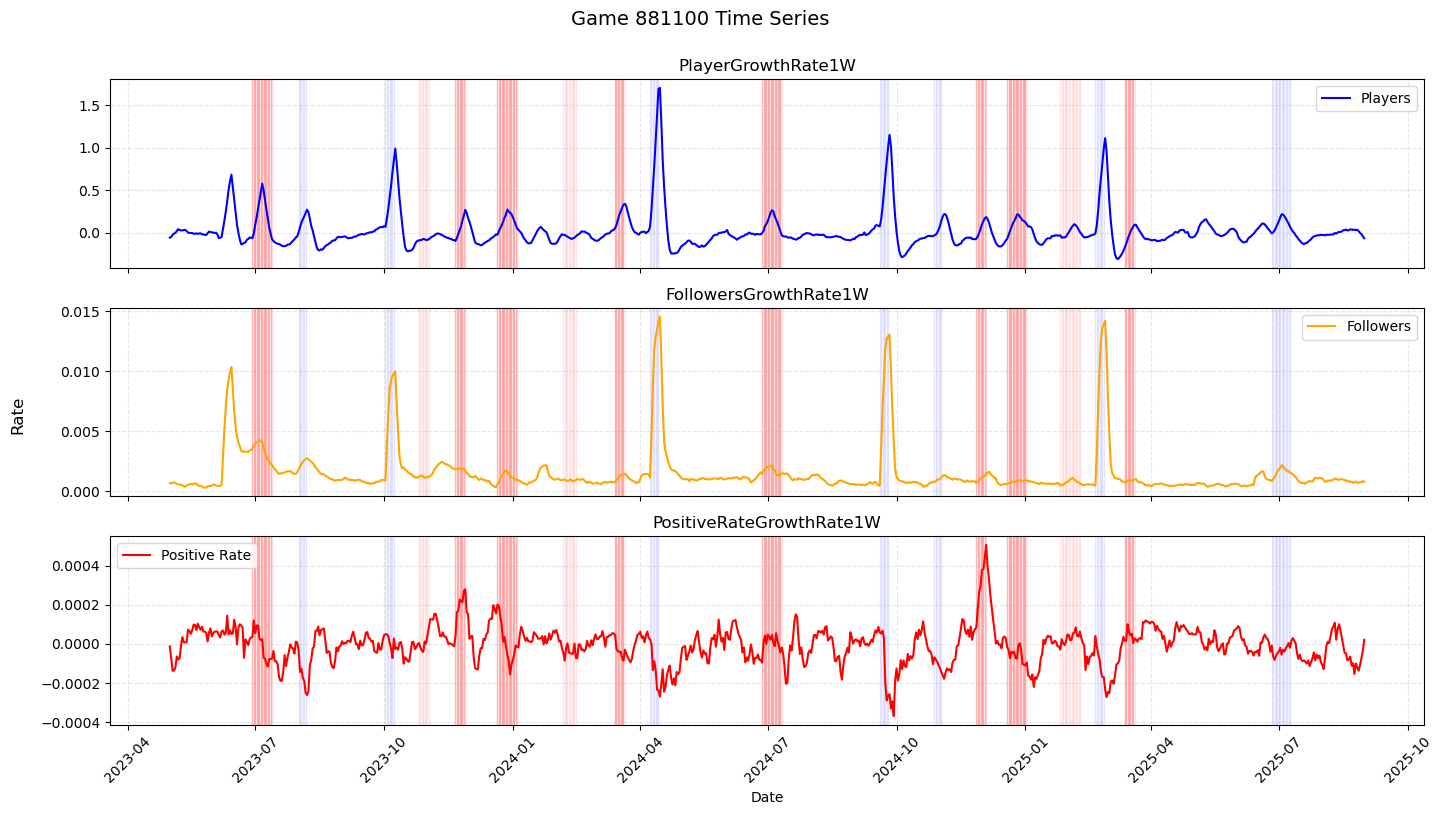

In [31]:
for index, sub_df in enumerate(game_dfs):
    fig, axes = plt.subplots(3, 1, figsize=(15, 9), sharex=True)

    # ---- 大圖標題 & 全圖Y軸標籤 ----
    gid = sub_df['GameID'].iloc[0]  # 假設每個sub_df都有GameID欄位
    fig.suptitle(f'Game {gid} Time Series', fontsize=14, y=0.95)  # 給整張圖標題
    fig.text(0.04, 0.5, 'Rate', va='center', rotation='vertical', fontsize=12)  # 給整張圖的y軸標籤

    # ---- 各子圖 ----
    axes[0].plot(sub_df['Date'], sub_df['PlayerGrowthRate1W'], label='Players', color='blue')
    axes[0].set_title('PlayerGrowthRate1W')

    axes[1].plot(sub_df['Date'], sub_df['FollowersGrowthRate1W'], label='Followers', color='orange')
    axes[1].set_title('FollowersGrowthRate1W')

    axes[2].plot(sub_df['Date'], sub_df['PositiveRateGrowthRate1W'], label='Positive Rate', color='red')
    axes[2].set_title('PositiveRateGrowthRate1W')

    # ---- 標記打折期間 ----
    for _, row in sub_df.iterrows():
        if row['SalePeriod'] == 1:
            for ax in axes:
                ax.axvspan(row['Date'], row['Date'], color='red', alpha=0.1)
        if row['DiscountDuringSale'] == 1:
            for ax in axes:
                ax.axvspan(row['Date'], row['Date'], color='red', alpha=0.2)
        if row['DiscountOutOfSale'] == 1:
            for ax in axes:
                ax.axvspan(row['Date'], row['Date'], color='blue', alpha=0.1)

        

    # ---- 共用設定 ----
    for ax in axes:
        ax.legend()
        ax.grid(True, linestyle='--', alpha=0.3)

    plt.xlabel('Date')
    plt.xticks(rotation=45)
    plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])  # 保留空間給標題和y標籤
    plt.show()
    



2W

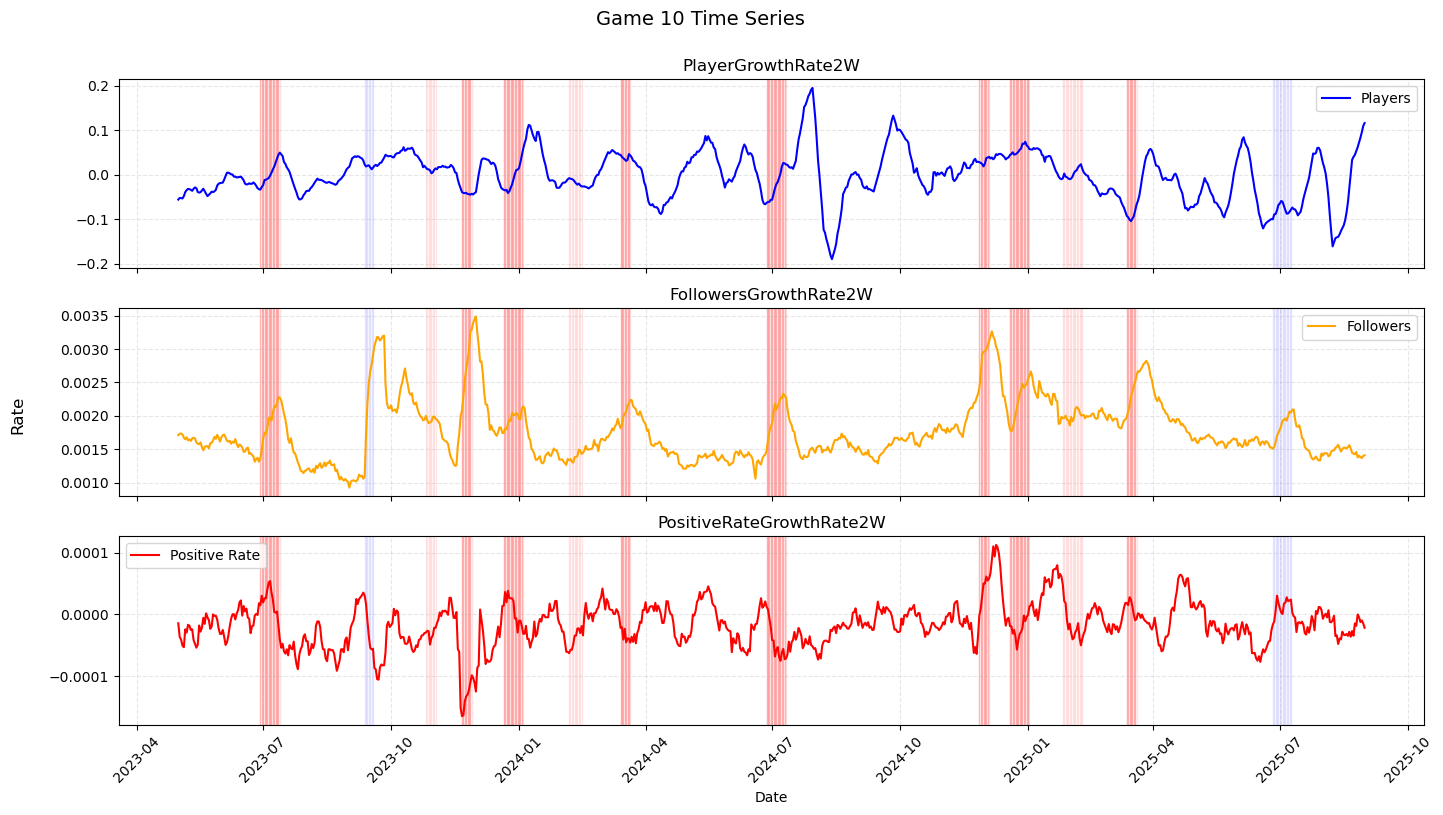

In [28]:
for index, sub_df in enumerate(game_dfs):
    fig, axes = plt.subplots(3, 1, figsize=(15, 9), sharex=True)

    # ---- 大圖標題 & 全圖Y軸標籤 ----
    gid = sub_df['GameID'].iloc[0]  # 假設每個sub_df都有GameID欄位
    fig.suptitle(f'Game {gid} Time Series', fontsize=14, y=0.95)  # 給整張圖標題
    fig.text(0.04, 0.5, 'Rate', va='center', rotation='vertical', fontsize=12)  # 給整張圖的y軸標籤

    # ---- 各子圖 ----
    axes[0].plot(sub_df['Date'], sub_df['PlayerGrowthRate2W'], label='Players', color='blue')
    axes[0].set_title('PlayerGrowthRate2W')

    axes[1].plot(sub_df['Date'], sub_df['FollowersGrowthRate2W'], label='Followers', color='orange')
    axes[1].set_title('FollowersGrowthRate2W')

    axes[2].plot(sub_df['Date'], sub_df['PositiveRateGrowthRate2W'], label='Positive Rate', color='red')
    axes[2].set_title('PositiveRateGrowthRate2W')

    # ---- 標記打折期間 ----
    for _, row in sub_df.iterrows():
        if row['SalePeriod'] == 1:
            for ax in axes:
                ax.axvspan(row['Date'], row['Date'], color='red', alpha=0.1)
        if row['DiscountDuringSale'] == 1:
            for ax in axes:
                ax.axvspan(row['Date'], row['Date'], color='red', alpha=0.2)
        if row['DiscountOutOfSale'] == 1:
            for ax in axes:
                ax.axvspan(row['Date'], row['Date'], color='blue', alpha=0.1)

    # ---- 共用設定 ----
    for ax in axes:
        ax.legend()
        ax.grid(True, linestyle='--', alpha=0.3)

    plt.xlabel('Date')
    plt.xticks(rotation=45)
    plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])  # 保留空間給標題和y標籤
    plt.show()
    break



1M

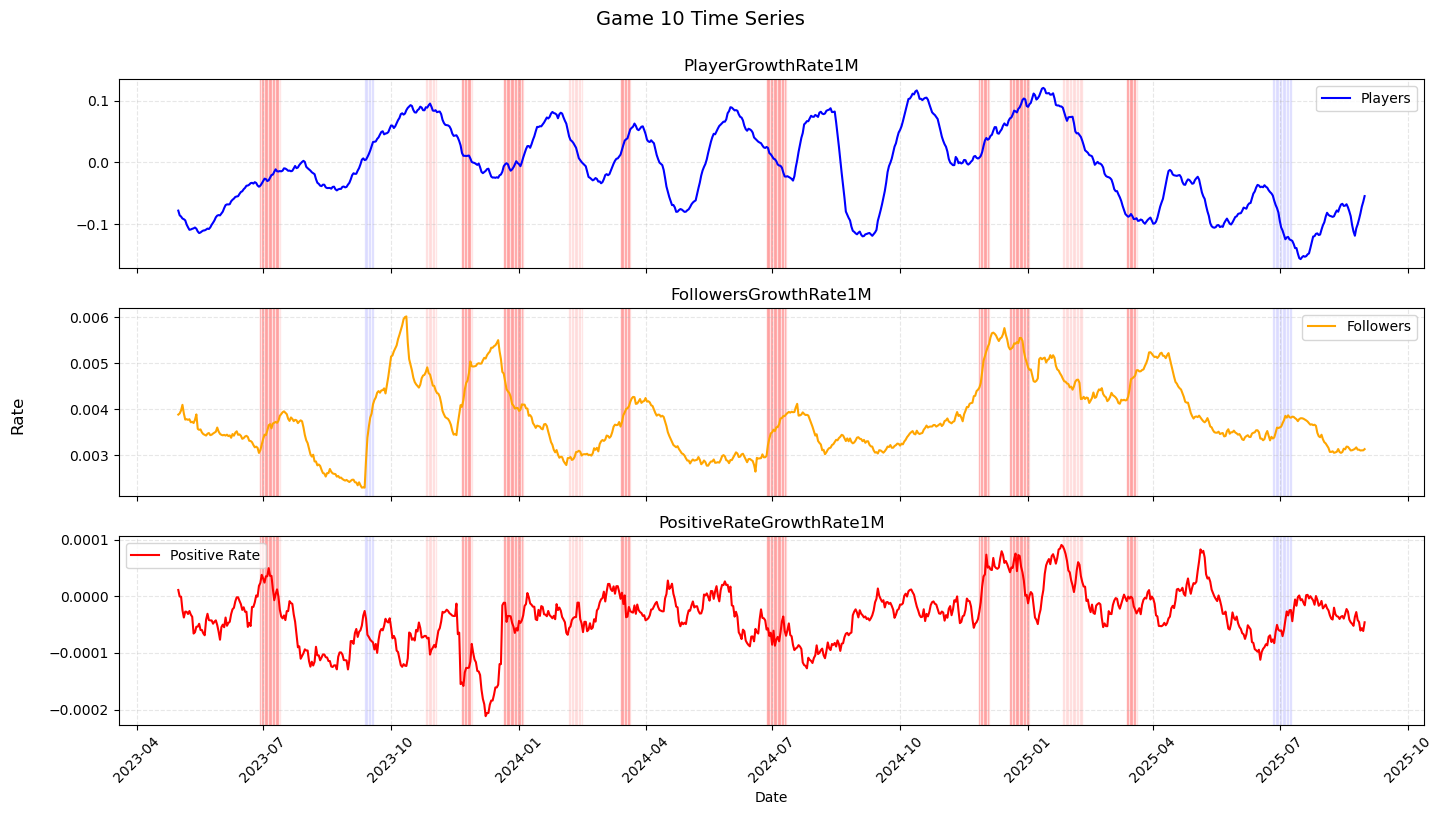

In [29]:
for index, sub_df in enumerate(game_dfs):
    fig, axes = plt.subplots(3, 1, figsize=(15, 9), sharex=True)

    # ---- 大圖標題 & 全圖Y軸標籤 ----
    gid = sub_df['GameID'].iloc[0]  # 假設每個sub_df都有GameID欄位
    fig.suptitle(f'Game {gid} Time Series', fontsize=14, y=0.95)  # 給整張圖標題
    fig.text(0.04, 0.5, 'Rate', va='center', rotation='vertical', fontsize=12)  # 給整張圖的y軸標籤

    # ---- 各子圖 ----
    axes[0].plot(sub_df['Date'], sub_df['PlayerGrowthRate1M'], label='Players', color='blue')
    axes[0].set_title('PlayerGrowthRate1M')

    axes[1].plot(sub_df['Date'], sub_df['FollowersGrowthRate1M'], label='Followers', color='orange')
    axes[1].set_title('FollowersGrowthRate1M')

    axes[2].plot(sub_df['Date'], sub_df['PositiveRateGrowthRate1M'], label='Positive Rate', color='red')
    axes[2].set_title('PositiveRateGrowthRate1M')

    # ---- 標記打折期間 ----
    for _, row in sub_df.iterrows():
        if row['SalePeriod'] == 1:
            for ax in axes:
                ax.axvspan(row['Date'], row['Date'], color='red', alpha=0.1)
        if row['DiscountDuringSale'] == 1:
            for ax in axes:
                ax.axvspan(row['Date'], row['Date'], color='red', alpha=0.2)
        if row['DiscountOutOfSale'] == 1:
            for ax in axes:
                ax.axvspan(row['Date'], row['Date'], color='blue', alpha=0.1)

    # ---- 共用設定 ----
    for ax in axes:
        ax.legend()
        ax.grid(True, linestyle='--', alpha=0.3)

    plt.xlabel('Date')
    plt.xticks(rotation=45)
    plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])  # 保留空間給標題和y標籤
    plt.show()
    break


In [30]:
game_type = df['GameID'].unique()
game_type

array([     10,  108600, 1091500, 1145360,  233860,  242760,  244210,
        244850,  294100,  323190,    3590,  367520,  376210,  381210,
          4000,  413150,  431730,  431960,  457140,  477160,  548430,
        582660,  588650,  644930,  703080,  814380,  880940,  881100],
      dtype=int64)